# Billionaires Statistics Dataset

In [537]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from matplotlib.patches import Patch
import geopandas as gpd

%matplotlib inline

In [2]:
df_bill = pd.read_csv("./Billionaires Statistics Dataset.csv")

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df_bill.head()

rank  finalWorth               category                personName   age  \
0     1      211000       Fashion & Retail  Bernard Arnault & family  74.0   
1     2      180000             Automotive                 Elon Musk  51.0   
2     3      114000             Technology                Jeff Bezos  59.0   
3     4      107000             Technology             Larry Ellison  78.0   
4     5      106000  Finance & Investments            Warren Buffett  92.0   

         country    city              source             industries  \
0         France   Paris                LVMH       Fashion & Retail   
1  United States  Austin       Tesla, SpaceX             Automotive   
2  United States  Medina              Amazon             Technology   
3  United States   Lanai              Oracle             Technology   
4  United States   Omaha  Berkshire Hathaway  Finance & Investments   

  countryOfCitizenship                      organization  selfMade status  \
0               France  LVMH Moët Hennessy Louis Vuitton     False      U   
1        United States                             Tesla      True      D   
2        United States                            Amazon      True      D   
3        United States                            Oracle      True      U   
4        United States    Berkshire Hathaway Inc. (Cl A)      True      D   

  gender       birthDate lastName firstName                 title  \
0      M   3/5/1949 0:00  Arnault   Bernard      Chairman and CEO   
1      M  6/28/1971 0:00     Musk      Elon                   CEO   
2      M  1/12/1964 0:00    Bezos      Jeff  Chairman and Founder   
3      M  8/17/1944 0:00  Ellison     Larry       CTO and Founder   
4      M  8/30/1930 0:00  Buffett    Warren                   CEO   

            date       state residenceStateRegion  birthYear  birthMonth  \
0  4/4/2023 5:01         NaN                  NaN     1949.0         3.0   
1  4/4/2023 5:01       Texas                South     1971.0         6.0   
2  4/4/2023 5:01  Washington                 West     1964.0         1.0   
3  4/4/2023 5:01      Hawaii                 West     1944.0         8.0   
4  4/4/2023 5:01    Nebraska              Midwest     1930.0         8.0   

   birthDay  cpi_country  cpi_change_country           gdp_country  \
0       5.0       110.05                 1.1   $2,715,518,274,227    
1      28.0       117.24                 7.5  $21,427,700,000,000    
2      12.0       117.24                 7.5  $21,427,700,000,000    
3      17.0       117.24                 7.5  $21,427,700,000,000    
4      30.0       117.24                 7.5  $21,427,700,000,000    

   gross_tertiary_education_enrollment  \
0                                 65.6   
1                                 88.2   
2                                 88.2   
3                                 88.2   
4                                 88.2   

   gross_primary_education_enrollment_country  life_expectancy_country  \
0                                       102.5                     82.5   
1                                       101.8                     78.5   
2                                       101.8                     78.5   
3                                       101.8                     78.5   
4                                       101.8                     78.5   

   tax_revenue_country_country  total_tax_rate_country  population_country  \
0                         24.2                    60.7          67059887.0   
1                          9.6                    36.6         328239523.0   
2                          9.6                    36.6         328239523.0   
3                          9.6                    36.6         328239523.0   
4                          9.6                    36.6         328239523.0   

   latitude_country  longitude_country  
0         46.227638           2.213749  
1         37.090240         -95.712891  
2         37.090240         -95.712891  
3         37.090240 

In [ ]:
df_bill.columns

In [5]:
df_bill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [6]:
df_bill['country'].value_counts().reset_index()

country  count
0          United States    754
1                  China    523
2                  India    157
3                Germany    102
4         United Kingdom     82
..                   ...    ...
73              Portugal      1
74               Georgia      1
75  Eswatini (Swaziland)      1
76            Uzbekistan      1
77               Armenia      1

[78 rows x 2 columns]

In [12]:
sns.set_style('darkgrid') 

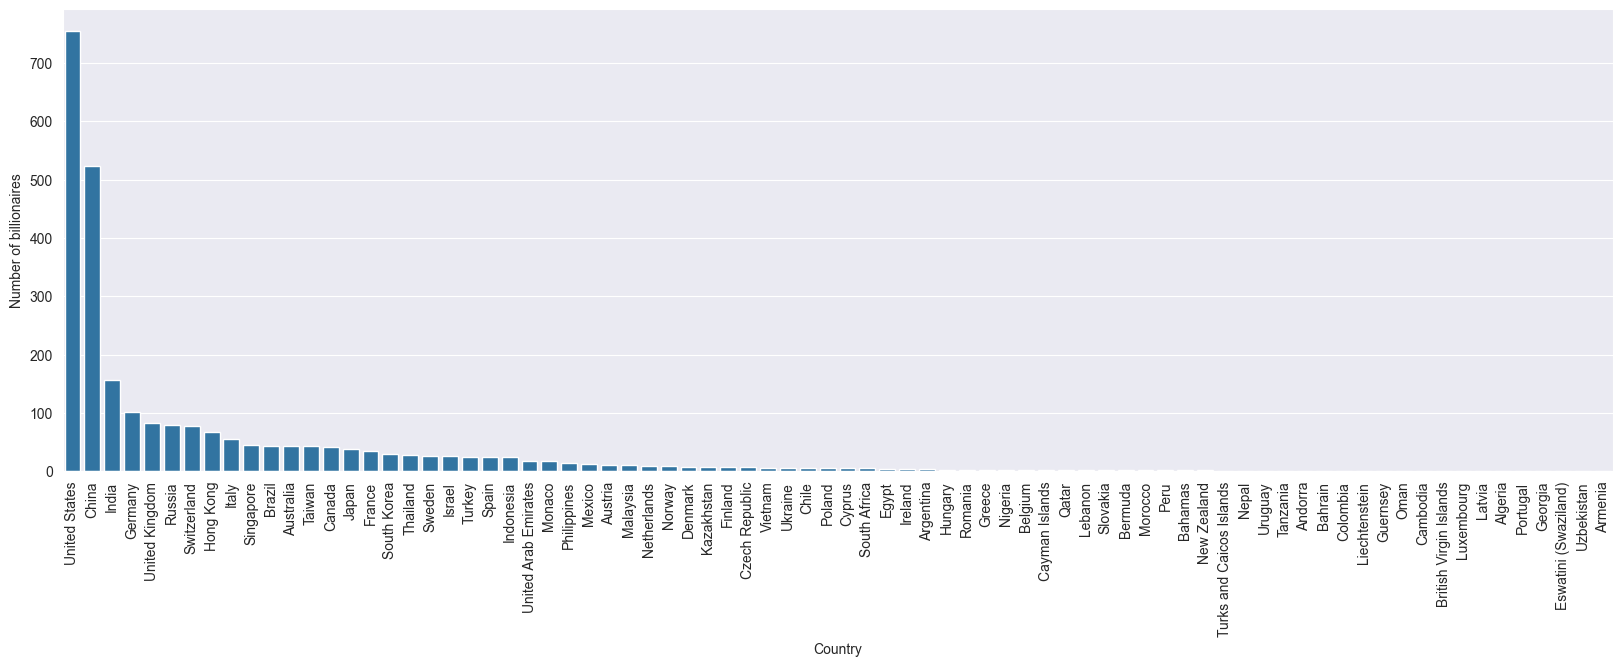

In [ ]:
plt.figure(figsize=(20, 6))
sns.barplot(data=df_bill, x=df_bill['country'].value_counts().reset_index()['country'], 
            y=df_bill['country'].value_counts().reset_index()['count'])
plt.xticks(rotation='vertical')
plt.xlabel('Country')
plt.ylabel('Number of billionaires')
plt.show()

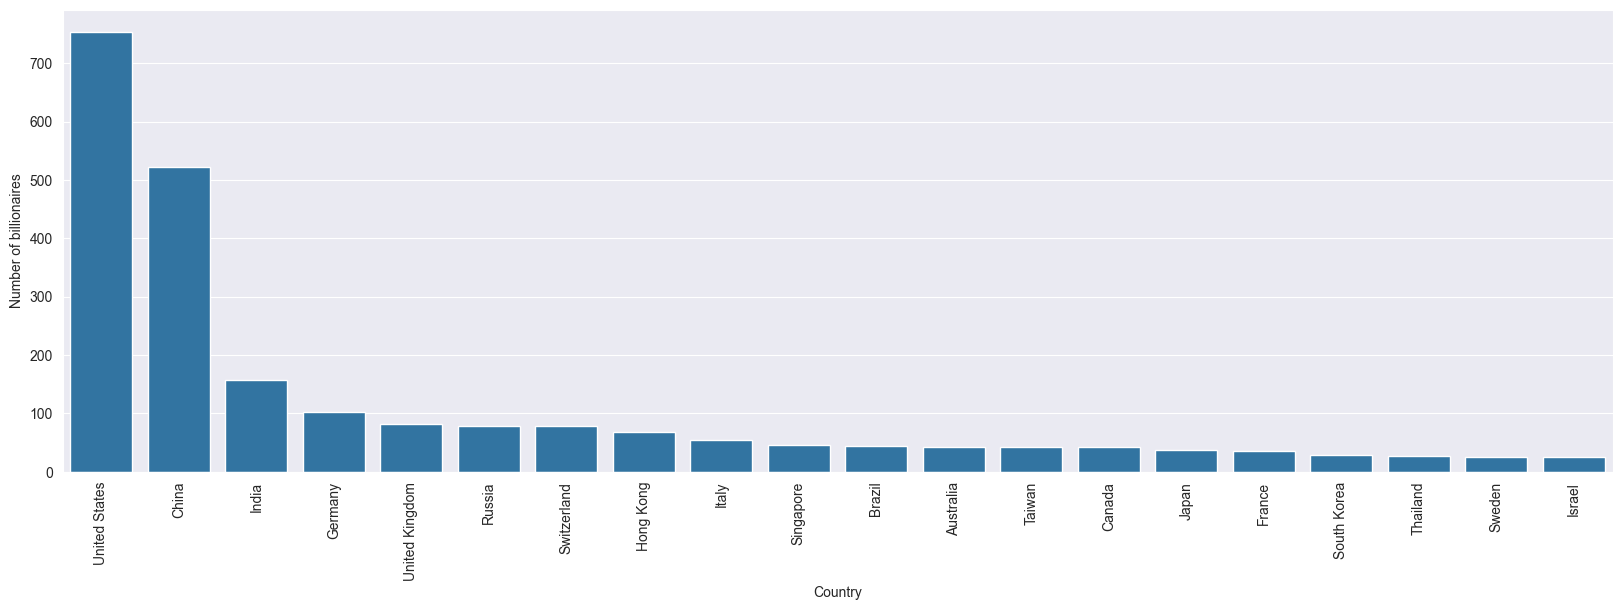

In [ ]:
plt.figure(figsize=(20, 6))
sns.barplot(data=df_bill, x=df_bill['country'].value_counts().reset_index()['country'].head(20), 
            y=df_bill['country'].value_counts().reset_index()['count'])
plt.xticks(rotation='vertical')
plt.xlabel('Country')
plt.ylabel('Number of billionaires')
plt.show()

In [ ]:
def split_dataframe(df):
    
    """Splits a DataFrame into two based on column data types.

    Args:
    df: The input DataFrame.

    Returns:
        A tuple of two DataFrames:
        - The first DataFrame contains columns with string/object data types.
        - The second DataFrame contains columns with numeric data types.
    """

    numeric_cols = df.select_dtypes(include=['number']).columns
    string_cols = df.select_dtypes(include=['object']).columns

    df_numeric = df[numeric_cols]
    df_string = df[string_cols]

    return df_numeric, df_string

In [ ]:
# Example usage:
# Assuming 'df' is your original DataFrame
df_numeric, df_string = split_dataframe(df_bill)

In [35]:
df_bill_num = df_bill[df_bill.select_dtypes(include=['number', 'bool']).columns].copy()
df_bill_str = df_bill[df_bill.select_dtypes(include=['object']).columns].copy()

In [36]:
df_bill_str.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   category              2640 non-null   object
 1   personName            2640 non-null   object
 2   country               2602 non-null   object
 3   city                  2568 non-null   object
 4   source                2640 non-null   object
 5   industries            2640 non-null   object
 6   countryOfCitizenship  2640 non-null   object
 7   organization          325 non-null    object
 8   status                2640 non-null   object
 9   gender                2640 non-null   object
 10  birthDate             2564 non-null   object
 11  lastName              2640 non-null   object
 12  firstName             2637 non-null   object
 13  title                 339 non-null    object
 14  date                  2640 non-null   object
 15  state                 753 non-null    

In [37]:
df_bill_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   age                                         2575 non-null   float64
 3   selfMade                                    2640 non-null   bool   
 4   birthYear                                   2564 non-null   float64
 5   birthMonth                                  2564 non-null   float64
 6   birthDay                                    2564 non-null   float64
 7   cpi_country                                 2456 non-null   float64
 8   cpi_change_country                          2456 non-null   float64
 9   gross_tertiary_education_enrollment         2458 non-null   float64
 10  gross_primar

In [42]:
df_bill_str = df_bill_str.astype(
    {
        'category' : 'category',
        'status' : 'category',
        'gender' : 'category',
        'birthDate' : 'datetime64[ns]',
        'date' : 'datetime64[ns]',
    }
)

In [43]:
df_bill_str.head()

category                personName        country    city  \
0       Fashion & Retail  Bernard Arnault & family         France   Paris   
1             Automotive                 Elon Musk  United States  Austin   
2             Technology                Jeff Bezos  United States  Medina   
3             Technology             Larry Ellison  United States   Lanai   
4  Finance & Investments            Warren Buffett  United States   Omaha   

               source             industries countryOfCitizenship  \
0                LVMH       Fashion & Retail               France   
1       Tesla, SpaceX             Automotive        United States   
2              Amazon             Technology        United States   
3              Oracle             Technology        United States   
4  Berkshire Hathaway  Finance & Investments        United States   

                       organization status gender  birthDate lastName  \
0  LVMH Moët Hennessy Louis Vuitton      U      M 1949-03-05  Arnault   
1                             Tesla      D      M 1971-06-28     Musk   
2                            Amazon      D      M 1964-01-12    Bezos   
3                            Oracle      U      M 1944-08-17  Ellison   
4    Berkshire Hathaway Inc. (Cl A)      D      M 1930-08-30  Buffett   

  firstName                 title                date       state  \
0   Bernard      Chairman and CEO 2023-04-04 05:01:00         NaN   
1      Elon                   CEO 2023-04-04 05:01:00       Texas   
2      Jeff  Chairman and Founder 2023-04-04 05:01:00  Washington   
3     Larry       CTO and Founder 2023-04-04 05:01:00      Hawaii   
4    Warren                   CEO 2023-04-04 05:01:00    Nebraska   

  residenceStateRegion           gdp_country  
0                  NaN   $2,715,518,274,227   
1                South  $21,427,700,000,000   
2                 West  $21,427,700,000,000   
3                 West  $21,427,700,000,000   
4              Midwest  $21,427,700,000,000

In [44]:
df_bill_num.head()

rank  finalWorth   age  selfMade  birthYear  birthMonth  birthDay  \
0     1      211000  74.0     False     1949.0         3.0       5.0   
1     2      180000  51.0      True     1971.0         6.0      28.0   
2     3      114000  59.0      True     1964.0         1.0      12.0   
3     4      107000  78.0      True     1944.0         8.0      17.0   
4     5      106000  92.0      True     1930.0         8.0      30.0   

   cpi_country  cpi_change_country  gross_tertiary_education_enrollment  \
0       110.05                 1.1                                 65.6   
1       117.24                 7.5                                 88.2   
2       117.24                 7.5                                 88.2   
3       117.24                 7.5                                 88.2   
4       117.24                 7.5                                 88.2   

   gross_primary_education_enrollment_country  life_expectancy_country  \
0                                       102.5                     82.5   
1                                       101.8                     78.5   
2                                       101.8                     78.5   
3                                       101.8                     78.5   
4                                       101.8                     78.5   

   tax_revenue_country_country  total_tax_rate_country  population_country  \
0                         24.2                    60.7          67059887.0   
1                          9.6                    36.6         328239523.0   
2                          9.6                    36.6         328239523.0   
3                          9.6                    36.6         328239523.0   
4                          9.6                    36.6         328239523.0   

   latitude_country  longitude_country  
0         46.227638           2.213749  
1         37.090240         -95.712891  
2         37.090240         -95.712891  
3         37.090240         -95.712891  
4         37.090240         -95.712891

In [46]:
df_bill_num.replace(
    {
        np.nan : 0
    }
    , inplace=True
)

In [ ]:
df_bill_num = df_bill_num.astype(
    {
        'age' : 'int',
        'birthYear' : 'int',
        'birthMonth' : 'int',
        'birthDay' : 'int',
        'population_country' : 'int'
    }
)

In [48]:
df_bill_num.head()

rank  finalWorth  age  selfMade  birthYear  birthMonth  birthDay  \
0     1      211000   74     False       1949           3         5   
1     2      180000   51      True       1971           6        28   
2     3      114000   59      True       1964           1        12   
3     4      107000   78      True       1944           8        17   
4     5      106000   92      True       1930           8        30   

   cpi_country  cpi_change_country  gross_tertiary_education_enrollment  \
0       110.05                 1.1                                 65.6   
1       117.24                 7.5                                 88.2   
2       117.24                 7.5                                 88.2   
3       117.24                 7.5                                 88.2   
4       117.24                 7.5                                 88.2   

   gross_primary_education_enrollment_country  life_expectancy_country  \
0                                       102.5                     82.5   
1                                       101.8                     78.5   
2                                       101.8                     78.5   
3                                       101.8                     78.5   
4                                       101.8                     78.5   

   tax_revenue_country_country  total_tax_rate_country  population_country  \
0                         24.2                    60.7            67059887   
1                          9.6                    36.6           328239523   
2                          9.6                    36.6           328239523   
3                          9.6                    36.6           328239523   
4                          9.6                    36.6           328239523   

   latitude_country  longitude_country  
0         46.227638           2.213749  
1         37.090240         -95.712891  
2         37.090240         -95.712891  
3         37.090240         -95.712891  
4         37.090240         -95.712891

In [49]:
df_bill_num['gdp_country'] = df_bill_str['gdp_country'].copy()

In [50]:
df_bill_num.head(2)

rank  finalWorth  age  selfMade  birthYear  birthMonth  birthDay  \
0     1      211000   74     False       1949           3         5   
1     2      180000   51      True       1971           6        28   

   cpi_country  cpi_change_country  gross_tertiary_education_enrollment  \
0       110.05                 1.1                                 65.6   
1       117.24                 7.5                                 88.2   

   gross_primary_education_enrollment_country  life_expectancy_country  \
0                                       102.5                     82.5   
1                                       101.8                     78.5   

   tax_revenue_country_country  total_tax_rate_country  population_country  \
0                         24.2                    60.7            67059887   
1                          9.6                    36.6           328239523   

   latitude_country  longitude_country           gdp_country  
0         46.227638           2.213749   $2,715,518,274,227   
1         37.090240         -95.712891  $21,427,700,000,000

In [54]:
df_bill_num['gdp_country'].replace(
    {
        np.nan : 0
    },
    inplace=True
)

In [59]:
df_bill_num['gdp_country_num'] = df_bill_num['gdp_country'] \
    .str.replace('$', '').str.replace(',', '').str.strip()

In [64]:
df_bill_num['gdp_country_num'] = pd.to_numeric(df_bill_num['gdp_country_num'])

In [65]:
df_bill_num.dtypes

rank                                            int64
finalWorth                                      int64
age                                             int64
selfMade                                         bool
birthYear                                       int64
birthMonth                                      int64
birthDay                                        int64
cpi_country                                   float64
cpi_change_country                            float64
gross_tertiary_education_enrollment           float64
gross_primary_education_enrollment_country    float64
life_expectancy_country                       float64
tax_revenue_country_country                   float64
total_tax_rate_country                        float64
population_country                              int64
latitude_country                              float64
longitude_country                             float64
gdp_country                                    object
gdp_country_num             

In [66]:
df_bill_str.isnull().sum()

category                   0
personName                 0
country                   38
city                      72
source                     0
industries                 0
countryOfCitizenship       0
organization            2315
status                     0
gender                     0
birthDate                 76
lastName                   0
firstName                  3
title                   2301
date                       0
state                   1887
residenceStateRegion    1893
gdp_country              164
dtype: int64

In [69]:
df_bill_str.shape

(2640, 18)

In [68]:
df_bill_str.isnull().sum() / len(df_bill_str) * 100

category                 0.000000
personName               0.000000
country                  1.439394
city                     2.727273
source                   0.000000
industries               0.000000
countryOfCitizenship     0.000000
organization            87.689394
status                   0.000000
gender                   0.000000
birthDate                2.878788
lastName                 0.000000
firstName                0.113636
title                   87.159091
date                     0.000000
state                   71.477273
residenceStateRegion    71.704545
gdp_country              6.212121
dtype: float64

In [67]:
df_bill_num.isnull().sum()

rank                                            0
finalWorth                                      0
age                                             0
selfMade                                        0
birthYear                                       0
birthMonth                                      0
birthDay                                        0
cpi_country                                     0
cpi_change_country                              0
gross_tertiary_education_enrollment             0
gross_primary_education_enrollment_country      0
life_expectancy_country                         0
tax_revenue_country_country                     0
total_tax_rate_country                          0
population_country                              0
latitude_country                                0
longitude_country                               0
gdp_country                                     0
gdp_country_num                               164
dtype: int64

# 1. Demographics and Background:
- What is the distribution of billionaires by country and region?
- What is the age range and median age of billionaires?
- How does gender representation vary among billionaires?
- What is the educational background of billionaires (e.g., degree types, institutions attended)?
- What percentage of billionaires are self-made versus those who inherited their wealth?

## 1.1. What is the distribution of billionaires by country and region?

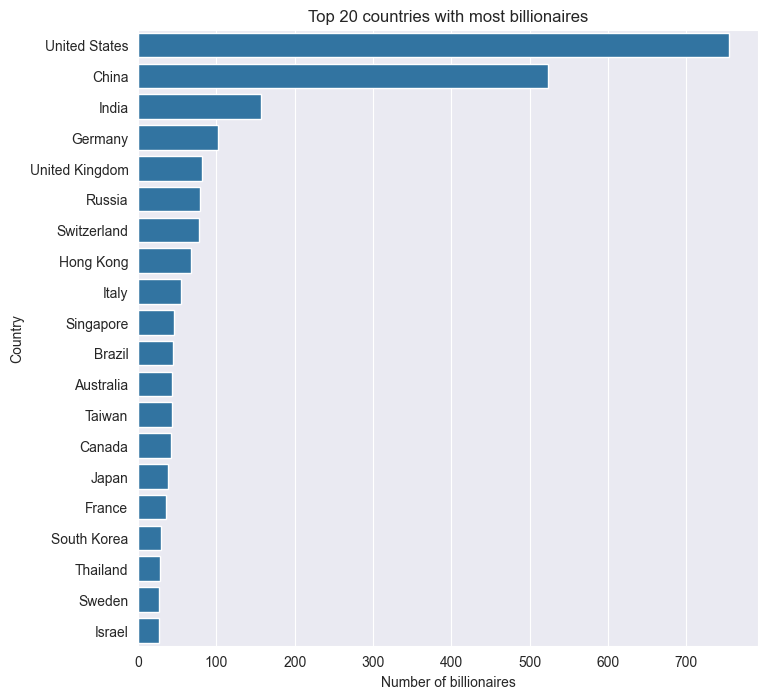

In [250]:
plt.figure(figsize=(8, 8))
sns.barplot(data=df_bill_str, y=df_bill_str['country'].value_counts().reset_index()['country'].head(20), 
            x=df_bill_str['country'].value_counts().reset_index()['count'])
plt.title("Top 20 countries with most billionaires")
plt.xticks(rotation=0)
plt.ylabel('Country')
plt.xlabel('Number of billionaires')
plt.show()

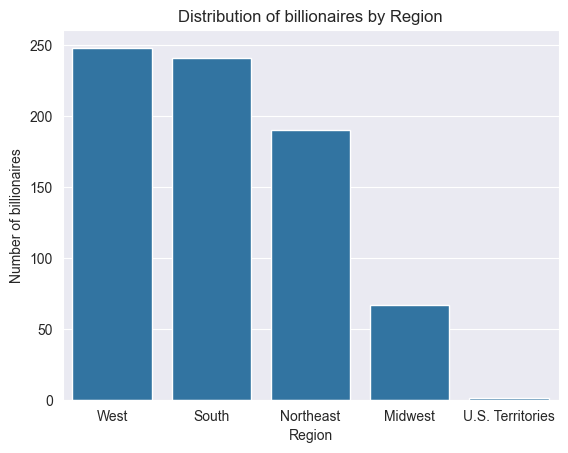

In [127]:
#plt.figure(figsize=(20, 8))
sns.barplot(data=df_bill_str, x=df_bill_str['residenceStateRegion'].value_counts().reset_index()['residenceStateRegion'], 
            y=df_bill_str['residenceStateRegion'].value_counts().reset_index()['count'])
plt.xticks(rotation=None)
plt.title('Distribution of billionaires by Region')
plt.xlabel('Region')
plt.ylabel('Number of billionaires')
plt.show()

In [113]:
df_bill_str_usa = df_bill_str[df_bill_str['country'] == 'United States'].copy()

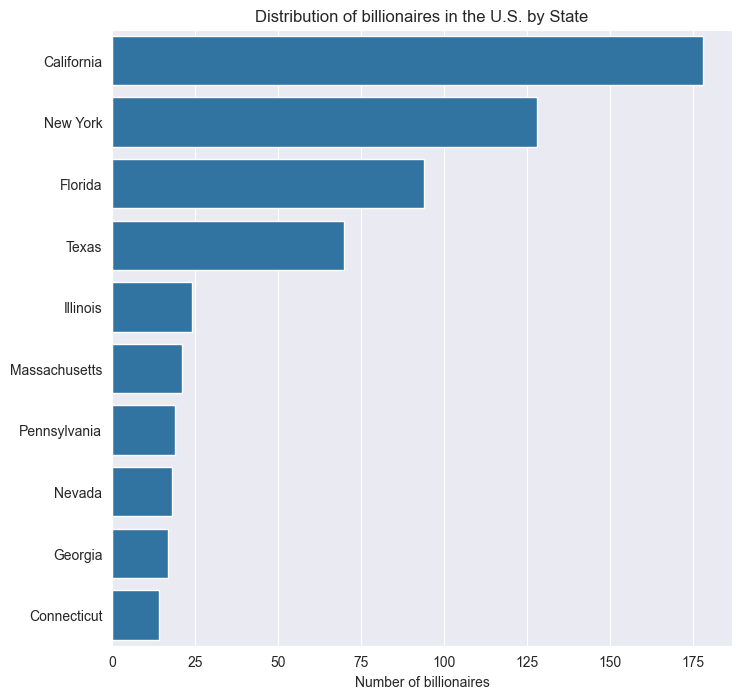

In [251]:
plt.figure(figsize=(8, 8))
sns.barplot(data=df_bill_str_usa, y=df_bill_str_usa['state'].value_counts().reset_index()['state'].head(10), 
            x=df_bill_str_usa['state'].value_counts().reset_index()['count'])
plt.xticks(rotation=None)
plt.title('Distribution of billionaires in the U.S. by State')
plt.ylabel(None)
plt.xlabel('Number of billionaires')
plt.show()

In [678]:
final_worth_mean = df_bill_num['finalWorth'].mean()
final_worth_median = df_bill_num['finalWorth'].median()

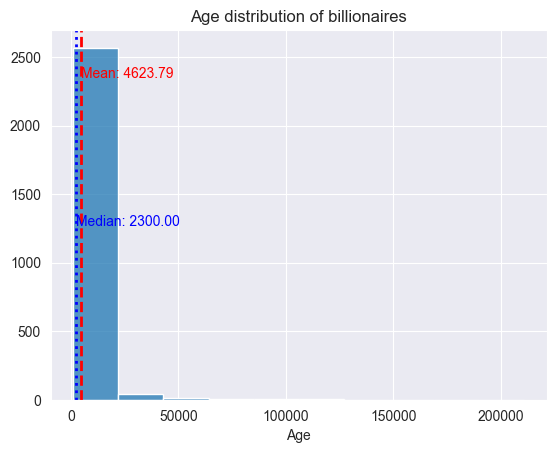

In [681]:
sns.histplot(data=df_bill_num, x='finalWorth', kde=False, bins=10)

# Add mean line with annotation
plt.axvline(final_worth_mean, color='red', linestyle='dashed', linewidth=2)
plt.text(final_worth_mean, plt.ylim()[1] * 0.9, f'Mean: {final_worth_mean:.2f}', rotation=0, va='top', color='red')

# Add median line with annotation
plt.axvline(final_worth_median, color='blue', linestyle='dotted', linewidth=2)
plt.text(final_worth_median, plt.ylim()[1] * 0.5, f'Median: {final_worth_median:.2f}', rotation=0, va='top', color='blue')

plt.title("Age distribution of billionaires")
plt.xlabel("Age")
plt.ylabel(None)
plt.show()

## Maps

In [614]:
countries = gpd.read_file("./world-administrative-boundaries/world-administrative-boundaries.shp")

In [618]:
countries[countries['name'].str.contains('great', case=False)]

iso3        status color_code                                        name  \
140  GBR  Member State        GBR  U.K. of Great Britain and Northern Ireland   

    continent           region iso_3166_1_  \
140    Europe  Northern Europe          GB   

                                           french_shor  \
140  Royaume-Uni de Grande-Bretagne et d'Irlande du...   

                                              geometry  
140  MULTIPOLYGON (((-1.05972 50.68749, -1.16833 50...

In [619]:
countries[countries['name'].str.contains('united', case=False)]


iso3                           status color_code  \
49   USA                     Member State        USA   
65   ARE                     Member State        ARE   
96   VIR  US Non-Self-Governing Territory        USA   
244  TZA                     Member State        TZA   

                             name continent            region iso_3166_1_  \
49       United States of America  Americas  Northern America          US   
65           United Arab Emirates      Asia      Western Asia          AE   
96   United States Virgin Islands  Americas         Caribbean          VI   
244   United Republic of Tanzania    Africa    Eastern Africa          TZ   

                      french_shor  \
49          États-Unis d'Amérique   
65            Émirats arabes unis   
96   United States Virgin Islands   
244   République-Unie de Tanzanie   

                                              geometry  
49   MULTIPOLYGON (((-155.00558 19.32888, -155.1453...  
65   MULTIPOLYGON (((53.96486 24.17944, 53.95500 24...  
96   MULTIPOLYGON (((-64.76418 17.77861, -64.75598 ...  
244  MULTIPOLYGON (((39.68249 -7.99333, 39.65305 -7...

In [620]:
countries[countries['name'].str.contains('rus', case=False)]


iso3        status color_code                name continent  \
22   CYP  Member State        CYP              Cyprus      Asia   
61   BRN  Member State        BRN   Brunei Darussalam      Asia   
210  RUS  Member State        RUS  Russian Federation    Europe   
241  BLR  Member State        BLR             Belarus    Europe   

                 region iso_3166_1_           french_shor  \
22         Western Asia          CY                Chypre   
61   South-Eastern Asia          BN     Brunéi Darussalam   
210      Eastern Europe          RU  Fédération de Russie   
241      Eastern Europe          BY               Bélarus   

                                              geometry  
22   POLYGON ((34.12000 35.40083, 33.95805 35.31277...  
61   MULTIPOLYGON (((115.02913 4.82021, 115.03546 4...  
210  MULTIPOLYGON (((131.87329 42.95694, 131.82413 ...  
241  POLYGON ((31.78388 52.10805, 31.73472 52.10610...

In [621]:
countries[countries['name'].str.contains('chi', case=False)]


iso3                              status color_code        name  \
80   None  Sovereignty unsettled JammuK-China        XXY  Aksai Chin   
171   CHN                        Member State        CHN       China   
194   CHL                        Member State        CHL       Chile   

    continent         region iso_3166_1_ french_shor  \
80       Asia   Eastern Asia        None  Aksai Chin   
171      Asia   Eastern Asia          CN       Chine   
194  Americas  South America          CL       Chili   

                                              geometry  
80   POLYGON ((78.94845 33.37895, 78.73987 33.54533...  
171  MULTIPOLYGON (((110.71583 20.06888, 110.77859 ...  
194  MULTIPOLYGON (((-67.20889 -55.89104, -67.24695...

In [622]:
countries[countries['name'].str.contains('ind', case=False)]


iso3        status color_code                            name continent  \
108  IND  Member State        IND                           India      Asia   
116  IDN  Member State        IDN                       Indonesia      Asia   
196  IOT  UK Territory        IOT  British Indian Ocean Territory    Africa   

                 region iso_3166_1_                     french_shor  \
108       Southern Asia          IN                            Inde   
116  South-Eastern Asia          ID                       Indonésie   
196      Eastern Africa          IO  British Indian Ocean Territory   

                                              geometry  
108  MULTIPOLYGON (((93.89941 6.80708, 93.82707 6.7...  
116  MULTIPOLYGON (((123.21846 -10.80917, 123.19832...  
196  POLYGON ((72.48720 -7.38194, 72.43817 -7.43625...

In [623]:
countries[countries['name'].str.contains('sing', case=False)]


iso3        status color_code       name continent              region  \
212  SGP  Member State        SGP  Singapore      Asia  South-Eastern Asia   

    iso_3166_1_ french_shor                                           geometry  
212          SG   Singapour  POLYGON ((103.95997 1.32083, 103.84192 1.25903...

In [545]:
# Embed number of billionaires to each country
df_bill_num['nBillionaires'] = df_bill_num.groupby('country')['country'].transform('count')

In [550]:
df_bill_num['nBillionaires'] = df_bill_num['nBillionaires'].fillna(0).astype('int')

In [576]:
df_bill_num.columns

Index(['rank', 'finalWorth', 'age', 'selfMade', 'birthYear', 'birthMonth',
       'birthDay', 'cpi_country', 'cpi_change_country',
       'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country',
       'gdp_country', 'gdp_country_num', 'gender', 'country', 'industries',
       'nBillionaires'],
      dtype='object')

In [ ]:
df_to_join_countries = df_bill_num[['country', 'nBillionaires']].copy()

country  nBillionaires
0            France             35
1     United States            754
2     United States            754
3     United States            754
4     United States            754
...             ...            ...
2635          China            523
2636  United States            754
2637          China            523
2638          China            523
2639    Philippines             14

[2602 rows x 2 columns]

In [583]:
df_to_join_countries.dropna(inplace=True)

In [586]:
df_to_join_countries.drop_duplicates(inplace=True)

In [624]:
df_to_join_countries = df_to_join_countries.replace(
    {
        "United States" : "United States of America",
        "United Kingdom" : "U.K. of Great Britain and Northern Ireland",
        "Russia" : "Russian Federation"
    }
)

In [625]:
df_to_join_countries

country  nBillionaires
0                       France             35
1     United States of America            754
7                       Mexico             13
8                        India            157
12                       Spain             25
...                        ...            ...
1925                  Tanzania              1
1966                   Bahrain              1
1979                      Peru              2
2002                   Andorra              1
2375                   Armenia              1

[78 rows x 2 columns]

In [626]:
countries = pd.merge(left=countries, right=df_to_join_countries, left_on='name', right_on='country', how='left')

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/mapclassify/classifiers.py:1653: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 9.
  self.bins = quantile(y, k=k)


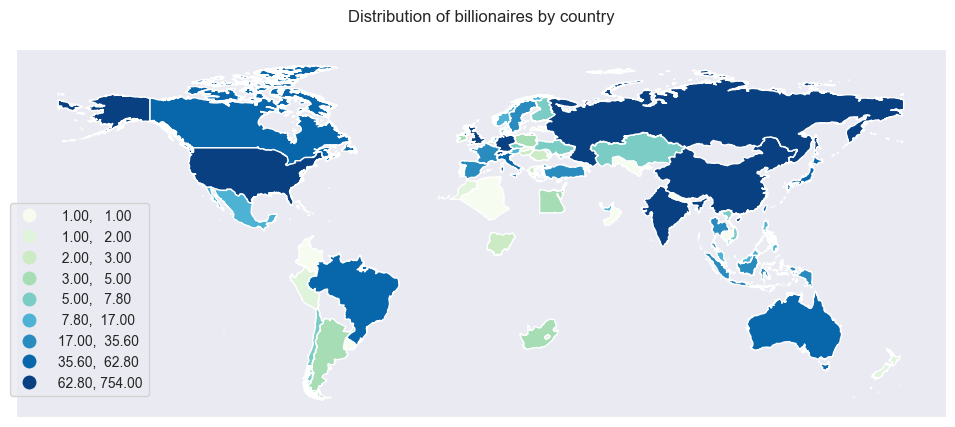

In [656]:
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(aspect='equal'))
countries.plot(column='nBillionaires', scheme='Quantiles', k=10, cmap='GnBu', legend=True, ax=ax)

# Customize the legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.1, 0.5, 0.05, 0.1))

plt.title("Distribution of billionaires by country", pad=20)
plt.xticks([])
plt.yticks([])
plt.show()

## 1.2. What is the age range and median age of billionaires?

In [141]:
df_bill_num.describe()

rank     finalWorth          age    birthYear   birthMonth  \
count  2640.000000    2640.000000  2640.000000  2640.000000  2640.000000   
mean   1289.159091    4623.787879    63.536364  1900.840152     5.575000   
std     739.693726    9834.240939    16.534444   327.583975     3.780204   
min       1.000000    1000.000000     0.000000     0.000000     0.000000   
25%     659.000000    1500.000000    55.000000  1947.000000     2.000000   
50%    1312.000000    2300.000000    65.000000  1957.000000     5.000000   
75%    1905.000000    4200.000000    74.000000  1966.000000     9.000000   
max    2540.000000  211000.000000   101.000000  2004.000000    12.000000   

          birthDay  cpi_country  cpi_change_country  \
count  2640.000000  2640.000000         2640.000000   
mean     11.751515   118.851053            4.060000   
std       9.982269    41.347766            3.667625   
min       0.000000     0.000000           -1.900000   
25%       1.000000   114.410000            1.400000   
50%      10.000000   117.240000            2.900000   
75%      20.000000   125.080000            7.500000   
max      31.000000   288.570000           53.500000   

       gross_tertiary_education_enrollment  \
count                          2640.000000   
mean                             62.591174   
std                              26.726648   
min                               0.000000   
25%                              50.600000   
50%                              63.200000   
75%                              88.200000   
max                             136.600000   

       gross_primary_education_enrollment_country  life_expectancy_country  \
count                                 2640.000000              2640.000000   
mean                                    95.806477                72.737083   
std                                     26.392395                20.120774   
min                                      0.000000                 0.000000   
25%                                    100.200000                77.000000   
50%                                    101.800000                78.500000   
75%                                    102.600000                80.900000   
max                                    142.100000                84.200000   

       tax_revenue_country_country  total_tax_rate_country  \
count                  2640.000000             2640.000000   
mean                     11.676553               40.932538   
std                       6.081301               16.169132   
min                       0.000000                0.000000   
25%                       9.400000               36.600000   
50%                       9.600000               36.600000   
75%                      12.000000               59.100000   
max                      37.200000              106.300000   

       population_country  latitude_country  longitude_country  \
count        2.640000e+03       2640.000000        2640.000000   
mean         4.785107e+08         32.735338          11.801475   
std          5.506987e+08         18.497489          84.078716   
min          0.000000e+00        -40.900557        -106.346771   
25%          6.029740e+07         35.861660         -95.712891   
50%          3.282395e+08         37.090240          10.451526   
75%          1.366418e+09         37.090240         104.195397   
max          1.397715e+09         61.924110         174.885971   

       gdp_country_num  
count     2.476000e+03  
mean      1.158287e+13  
std       9.575588e+12  
min       3.154058e+09  
25%       1.736426e+12  
50%       1.991000e+13  
75%       2.142770e+13  
max       2.142770e+13

In [ ]:
mean_age = df_bill_num['age'].mean()
median_age = df_bill_num['age'].median()

In [145]:
def add_mean_line(data, var=None, **kws):
    
    # If no variable provided, skip adding mean line
    if not var: return
    
    # Calculate mean for each group
    m = np.mean(data[var])
    
    # Get current axis
    ax = plt.gca()
    
    # Add line at group mean
    ax.axvline(m, color='maroon', lw=3, ls='--')
    
    # Annotate group mean
    x_pos = 0.65
    if m > 5000:
        x_pos = 0.2
    
    ax.text(x_pos, 0.7, f'mean={m:.0f}',
            transform=ax.transAxes, # Transforms positions to range from 0,0 to (1,1)
            color='maroon', fontweight='bold', fontsize=12)

In [ ]:
def add_median_line(data, var=None, **kws):
    
    # If no variable provided, skip adding mean line
    if not var: return
    
    # Calculate median for each group
    m = np.median(data[var])
    
    # Get current axis
    ax = plt.gca()
    
    # Add line at group mean
    ax.axvline(m, color='maroon', lw=3, ls='--')
    
    # Annotate group mean
    x_pos = 0.65
    if m > 5000:
        x_pos = 0.2
    
    ax.text(x_pos, 0.7, f'mean={m:.0f}',
            transform=ax.transAxes, # Transforms positions to range from 0,0 to (1,1)
            color='maroon', fontweight='bold', fontsize=12)

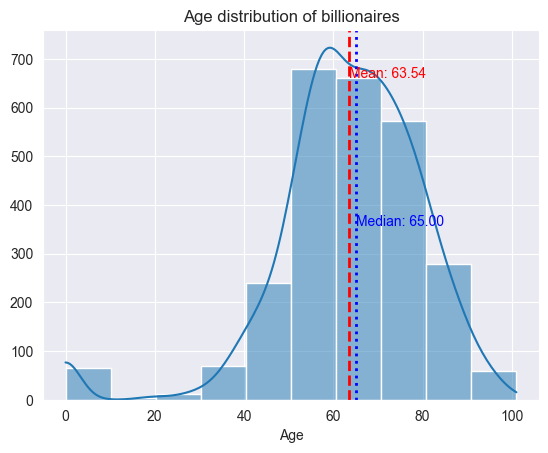

In [157]:
sns.histplot(data=df_bill_num, x='age', kde=True, bins=10)

# Add mean line with annotation
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2)
plt.text(mean_age, plt.ylim()[1] * 0.9, f'Mean: {mean_age:.2f}', rotation=0, va='top', color='red')

# Add median line with annotation
plt.axvline(median_age, color='blue', linestyle='dotted', linewidth=2)
plt.text(median_age, plt.ylim()[1] * 0.5, f'Median: {median_age:.2f}', rotation=0, va='top', color='blue')

plt.title("Age distribution of billionaires")
plt.xlabel("Age")
plt.ylabel(None)
plt.show()

In [158]:
df_bill_num['gender'] = df_bill_str['gender'].copy()

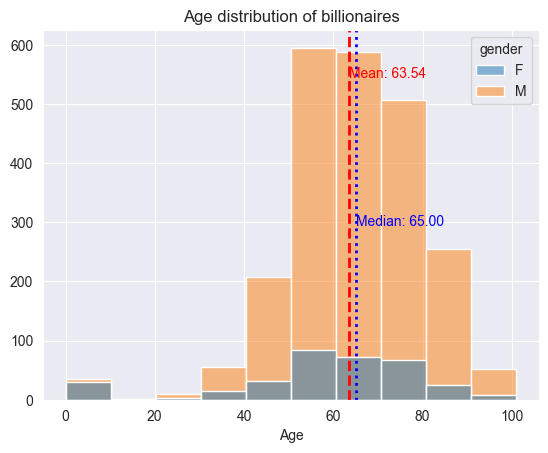

In [253]:
sns.histplot(data=df_bill_num, x='age', kde=False, bins=10, hue='gender')

# Add mean line with annotation
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2)
plt.text(mean_age, plt.ylim()[1] * 0.9, f'Mean: {mean_age:.2f}', rotation=0, va='top', color='red')

# Add median line with annotation
plt.axvline(median_age, color='blue', linestyle='dotted', linewidth=2)
plt.text(median_age, plt.ylim()[1] * 0.5, f'Median: {median_age:.2f}', rotation=0, va='top', color='blue')

plt.title("Age distribution of billionaires")
plt.xlabel("Age")
plt.ylabel(None)
plt.show()

## 1.3. How does gender representation vary among billionaires?

In [255]:
df_bill_str['gender'].value_counts().reset_index()

gender  count
0      M   2303
1      F    337

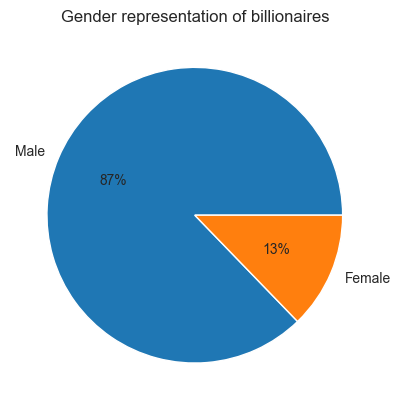

In [257]:
# define Seaborn color palette to use 
palette_color = sns.color_palette('tab10') 

# plotting data on chart 
plt.pie(df_bill_num['gender'].value_counts().reset_index()['count'],
        labels=df_bill_num['gender'].value_counts().reset_index()['gender'] \
                .map(
                        {
                                'M' : "Male",
                                'F' : 'Female'
                        }
                )
        , colors=palette_color, autopct='%.0f%%') 

plt.title("Gender representation of billionaires")

# displaying chart 
plt.show() 

In [240]:
# Get the top 10 countries by count
top_10_countries = df_bill_str['country'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 countries
df_top_10 = df_bill_str[df_bill_str['country'].isin(top_10_countries)]

<Figure size 1400x1000 with 0 Axes>

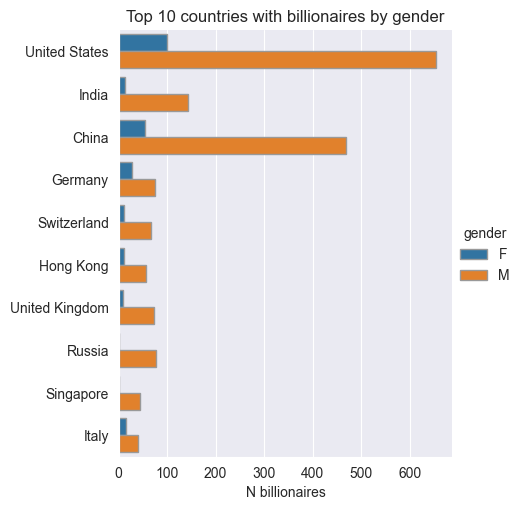

In [ ]:
plt.figure(figsize=(14, 10))
sns.catplot(
    data=df_top_10, y="country", hue="gender",
    palette="tab10", edgecolor=".6", kind='count',
)

plt.ylabel(None)
plt.xlabel("N billionaires")
plt.title("Top 10 countries with billionaires by gender")
plt.show()

### Number of billionaires by birth month

In [405]:
month_names = {
    1 : 'Jan',
    2 : 'Feb',
    3 : 'Mar',
    4 : 'Apr',
    5 : 'May',
    6 : 'Jun',
    7 : 'Jul',
    8 : 'Aug', 
    9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}

In [406]:
df_bill_str['birthMonthNames'] = df_bill_num['birthMonth'].map(month_names).copy()

In [416]:
df_bill_str.sample(5)

category     personName        country       city  \
1258       Diversified      Yuzhu Shi          China   Shanghai   
1456       Diversified  Sanjiv Goenka          India    Kolkata   
1704  Fashion & Retail  Suh Kyung-bae    South Korea      Seoul   
434         Technology  David Steward  United States  St. Louis   
600            Telecom     Richard Li      Hong Kong  Hong Kong   

                         source        industries countryOfCitizenship  \
1258  Online games, investments       Diversified                China   
1456                Diversified       Diversified                India   
1704                  Cosmetics  Fashion & Retail          South Korea   
434                 IT provider        Technology        United States   
600                     Telecom           Telecom            Hong Kong   

                  organization status gender  birthDate lastName  firstName  \
1258                       NaN      D      M 1962-09-01      Shi      Yuzhu   
1456                       NaN      D      M 1961-01-29   Goenka     Sanjiv   
1704  Amorepacific Corp. (New)      D      M 1963-01-14      Suh  Kyung-bae   
434                        NaN      U      M 1951-07-02  Steward      David   
600                        NaN      D      M 1966-11-08       Li    Richard   

         title                date     state residenceStateRegion  \
1258       NaN 2023-04-04 05:01:00       NaN                  NaN   
1456       NaN 2023-04-04 05:01:00       NaN                  NaN   
1704  Chairman 2023-04-04 05:01:00       NaN                  NaN   
434        NaN 2023-04-04 05:01:00  Missouri              Midwest   
600        NaN 2023-04-04 05:01:00       NaN                  NaN   

               gdp_country birthMonthNames  
1258  $19,910,000,000,000              Sep  
1456   $2,611,000,000,000              Jan  
1704   $2,029,000,000,000              Jan  
434   $21,427,700,000,000              Jul  
600                    NaN             Nov

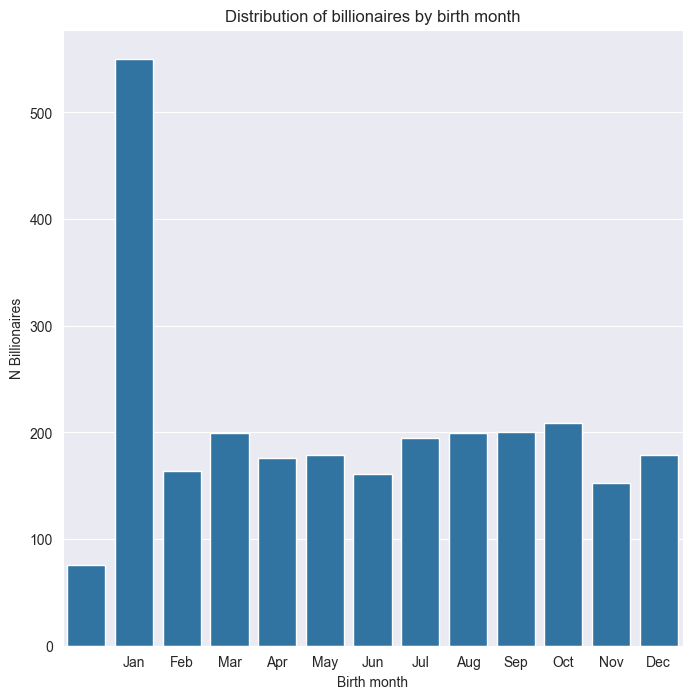

In [463]:
plt.figure(figsize=(8, 8))
sns.barplot(data=df_bill_num, x=df_bill_num['birthMonth'].value_counts().reset_index()['birthMonth'], 
            y=df_bill_num['birthMonth'].value_counts().reset_index()['count'])
plt.title("Distribution of billionaires by birth month")
plt.xticks([i for i in month_names.keys()], [i for i in month_names.values()], rotation=0)
plt.ylabel('N Billionaires')
plt.xlabel('Birth month')
plt.show()

In [417]:
df_bill_str_usa = df_bill_str[df_bill_str['country'] == 'United States'].copy()

In [466]:
df_bill_str_usa['birthMonth'] = df_bill_num['birthMonth'].copy()

In [467]:
df_bill_str_usa.shape

(754, 20)

In [475]:
df_bill_str_usa.head()

category      personName        country    city  \
1             Automotive       Elon Musk  United States  Austin   
2             Technology      Jeff Bezos  United States  Medina   
3             Technology   Larry Ellison  United States   Lanai   
4  Finance & Investments  Warren Buffett  United States   Omaha   
5             Technology      Bill Gates  United States  Medina   

               source             industries countryOfCitizenship  \
1       Tesla, SpaceX             Automotive        United States   
2              Amazon             Technology        United States   
3              Oracle             Technology        United States   
4  Berkshire Hathaway  Finance & Investments        United States   
5           Microsoft             Technology        United States   

                      organization status gender  birthDate lastName  \
1                            Tesla      D      M 1971-06-28     Musk   
2                           Amazon      D      M 1964-01-12    Bezos   
3                           Oracle      U      M 1944-08-17  Ellison   
4   Berkshire Hathaway Inc. (Cl A)      D      M 1930-08-30  Buffett   
5  Bill & Melinda Gates Foundation      D      M 1955-10-28    Gates   

  firstName                 title                date       state  \
1      Elon                   CEO 2023-04-04 05:01:00       Texas   
2      Jeff  Chairman and Founder 2023-04-04 05:01:00  Washington   
3     Larry       CTO and Founder 2023-04-04 05:01:00      Hawaii   
4    Warren                   CEO 2023-04-04 05:01:00    Nebraska   
5      Bill               Cochair 2023-04-04 05:01:00  Washington   

  residenceStateRegion           gdp_country birthMonthNames  birthMonth  
1                South  $21,427,700,000,000              Jun           6  
2                 West  $21,427,700,000,000              Jan           1  
3                 West  $21,427,700,000,000              Aug           8  
4              Midwest  $21,427,700,000,000              Aug           8  
5                 West  $21,427,700,000,000              Oct          10

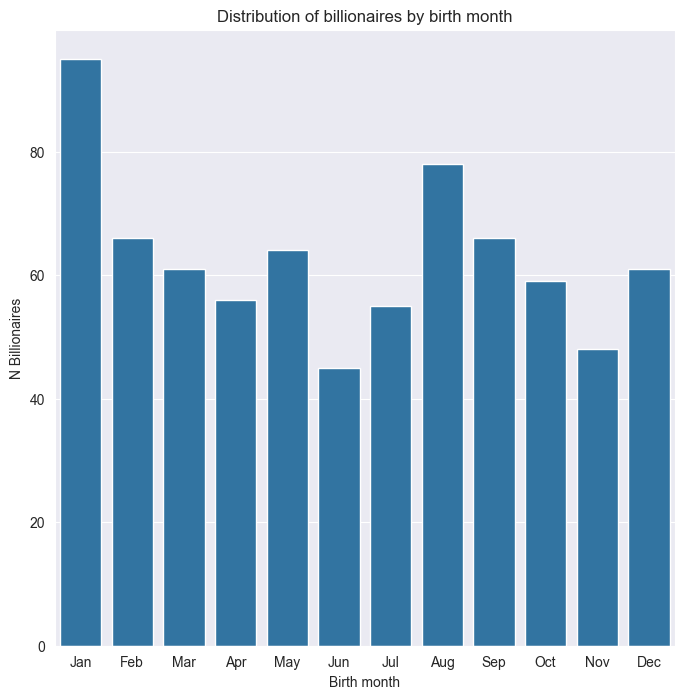

In [489]:
plt.figure(figsize=(8, 8))
sns.barplot(data=df_bill_str_usa, x=df_bill_str_usa['birthMonth'].value_counts().reset_index()['birthMonth'], 
            y=df_bill_str_usa['birthMonth'].value_counts().reset_index()['count'], order=None)
plt.title("Distribution of billionaires by birth month")
plt.xticks([i for i in range(0, 12, 1)], [i for i in month_names.values()], rotation=0)
plt.ylabel('N Billionaires')
plt.xlabel('Birth month')
plt.show()

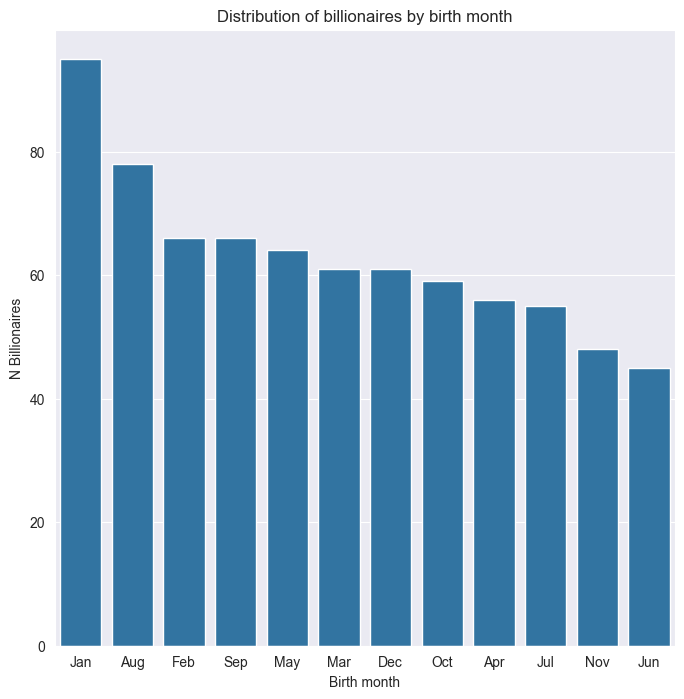

In [486]:
plt.figure(figsize=(8, 8))
sns.barplot(data=df_bill_str_usa, x=df_bill_str_usa['birthMonthNames'].value_counts().reset_index()['birthMonthNames'], 
            y=df_bill_str_usa['birthMonthNames'].value_counts().reset_index()['count'])
plt.title("Distribution of billionaires by birth month")
plt.xticks(rotation=0)
plt.ylabel('N Billionaires')
plt.xlabel('Birth month')
plt.show()

In [274]:
df_bill_str.groupby(['country', 'gender']).count()['category'].reset_index()

/var/folders/v6/zmyt_9xj0d7g8z7n0vv4prfh0000gn/T/ipykernel_72928/782648675.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_bill_str.groupby(['country', 'gender']).count()['category'].reset_index()


country gender  category
0       Algeria      F         0
1       Algeria      M         1
2       Andorra      F         1
3       Andorra      M         0
4     Argentina      F         0
..          ...    ...       ...
151     Uruguay      M         1
152  Uzbekistan      F         0
153  Uzbekistan      M         1
154     Vietnam      F         1
155     Vietnam      M         5

[156 rows x 3 columns]

In [277]:
country_gender = df_bill_str.groupby(['country', 'gender'], observed=False).count()['category'].reset_index()

In [303]:
country_gender_reset = df_bill_str.groupby(['country', 'gender'], observed=False).count()['category'].reset_index().set_index('country')

In [287]:
top_10_countries

Index(['United States', 'China', 'India', 'Germany', 'United Kingdom',
       'Russia', 'Switzerland', 'Hong Kong', 'Italy', 'Singapore'],
      dtype='object', name='country')

In [310]:
country_gender_reset[country_gender_reset.index.isin(top_10_countries)]

gender  category
country                        
China               F        54
China               M       469
Germany             F        27
Germany             M        75
Hong Kong           F        12
Hong Kong           M        56
India               F        13
India               M       144
Italy               F        16
Italy               M        39
Russia              F         1
Russia              M        78
Singapore           F         1
Singapore           M        45
Switzerland         F        12
Switzerland         M        66
United Kingdom      F         9
United Kingdom      M        73
United States       F        99
United States       M       655

## 1.4. What percentage of billionaires are self-made versus those who inherited their wealth?

In [311]:
df_bill_num['selfMade'].value_counts()

selfMade
True     1812
False     828
Name: count, dtype: int64

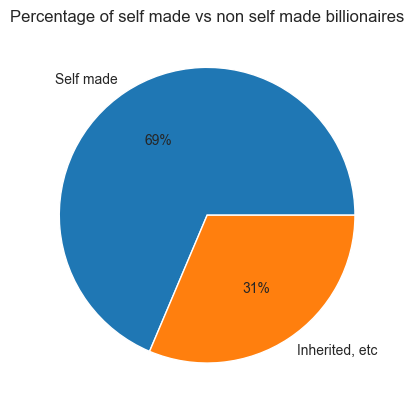

In [313]:
# define Seaborn color palette to use 
palette_color = sns.color_palette('tab10') 

# plotting data on chart 
plt.pie(df_bill_num['selfMade'].value_counts().reset_index()['count'],
        labels=df_bill_num['selfMade'].value_counts().reset_index()['selfMade'] \
                .map(
                        {
                                True : "Self made",
                                False : 'Inherited, etc'
                        }
                )
        , colors=palette_color, autopct='%.0f%%') 

plt.title("Percentage of self made vs non self made billionaires")

# displaying chart 
plt.show() 

In [314]:
df_bill_num['country'] = df_bill_str['country'].copy()

In [315]:
df_bill_num.head()

rank  finalWorth  age  selfMade  birthYear  birthMonth  birthDay  \
0     1      211000   74     False       1949           3         5   
1     2      180000   51      True       1971           6        28   
2     3      114000   59      True       1964           1        12   
3     4      107000   78      True       1944           8        17   
4     5      106000   92      True       1930           8        30   

   cpi_country  cpi_change_country  gross_tertiary_education_enrollment  \
0       110.05                 1.1                                 65.6   
1       117.24                 7.5                                 88.2   
2       117.24                 7.5                                 88.2   
3       117.24                 7.5                                 88.2   
4       117.24                 7.5                                 88.2   

   gross_primary_education_enrollment_country  life_expectancy_country  \
0                                       102.5                     82.5   
1                                       101.8                     78.5   
2                                       101.8                     78.5   
3                                       101.8                     78.5   
4                                       101.8                     78.5   

   tax_revenue_country_country  total_tax_rate_country  population_country  \
0                         24.2                    60.7            67059887   
1                          9.6                    36.6           328239523   
2                          9.6                    36.6           328239523   
3                          9.6                    36.6           328239523   
4                          9.6                    36.6           328239523   

   latitude_country  longitude_country           gdp_country  gdp_country_num  \
0         46.227638           2.213749   $2,715,518,274,227      2.715518e+12   
1         37.090240         -95.712891  $21,427,700,000,000      2.142770e+13   
2         37.090240         -95.712891  $21,427,700,000,000      2.142770e+13   
3         37.090240         -95.712891  $21,427,700,000,000      2.142770e+13   
4         37.090240         -95.712891  $21,427,700,000,000      2.142770e+13   

  gender        country  
0      M         France  
1      M  United States  
2      M  United States  
3      M  United States  
4      M  United States

In [316]:
# Get the top 10 countries by count
top_10_countries_num = df_bill_num['country'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 countries
df_top_10_num = df_bill_num[df_bill_num['country'].isin(top_10_countries_num)]

In [346]:
def format_selfmade_legend(value):
    """Formats the legend label based on the 'selfMade' value."""
    if value == 'True':
        return "Self-made"
    else:
        return "Inherited, etc."

In [399]:
new_labels

['Inherited, etc.', 'Self-made']

In [339]:
labels

['False', 'True']

<Figure size 1400x1000 with 0 Axes>

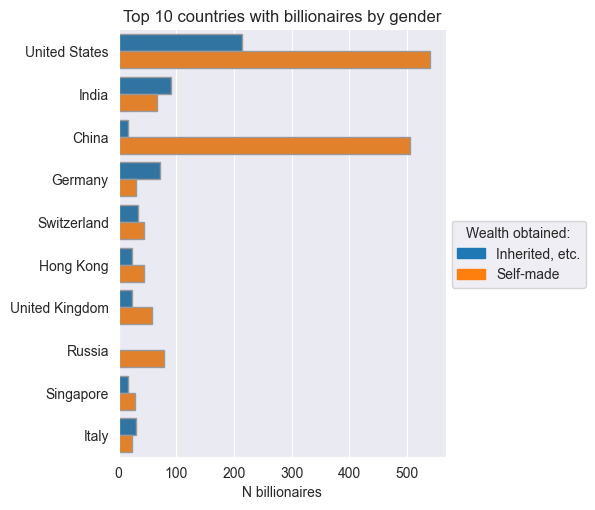

In [ ]:
plt.figure(figsize=(14, 10))
self_made_g = sns.catplot(
    data=df_top_10_num, y="country", hue="selfMade",
    palette="tab10", edgecolor=".6", kind='count',
)

# Customize legend labels
handles, labels = plt.gca().get_legend_handles_labels()  # Get existing handles and labels
new_labels = [format_selfmade_legend(l) for l in labels]  # Format labels

# Create custom legend patch for self-made and inherited
patch1 = Patch(color='tab:blue', label=new_labels[0])
patch2 = Patch(color='tab:orange', label=new_labels[1])  # Assuming "Inherited, etc." uses the second color

# Create the legend with custom title and patches
# plt.legend(handles=[patch1, patch2], labels=new_labels, title="Wealth obtained:")

# Remove default legend
self_made_g._legend.remove()

# Add new legend
plt.legend(
    handles=[patch1, patch2],
    labels=new_labels,
    title="Wealth obtained:",
    loc="lower right",  # Adjust position as necessary
    bbox_to_anchor=(1.45, 0.38)  # Fine-tune placement inside the plot
)

plt.ylabel(None)
plt.xlabel("N billionaires")
plt.title("Top 10 countries with billionaires by gender")
plt.show()

In [422]:
df_bill.head()

rank  finalWorth               category                personName   age  \
0     1      211000       Fashion & Retail  Bernard Arnault & family  74.0   
1     2      180000             Automotive                 Elon Musk  51.0   
2     3      114000             Technology                Jeff Bezos  59.0   
3     4      107000             Technology             Larry Ellison  78.0   
4     5      106000  Finance & Investments            Warren Buffett  92.0   

         country    city              source             industries  \
0         France   Paris                LVMH       Fashion & Retail   
1  United States  Austin       Tesla, SpaceX             Automotive   
2  United States  Medina              Amazon             Technology   
3  United States   Lanai              Oracle             Technology   
4  United States   Omaha  Berkshire Hathaway  Finance & Investments   

  countryOfCitizenship                      organization  selfMade status  \
0               France  LVMH Moët Hennessy Louis Vuitton     False      U   
1        United States                             Tesla      True      D   
2        United States                            Amazon      True      D   
3        United States                            Oracle      True      U   
4        United States    Berkshire Hathaway Inc. (Cl A)      True      D   

  gender       birthDate lastName firstName                 title  \
0      M   3/5/1949 0:00  Arnault   Bernard      Chairman and CEO   
1      M  6/28/1971 0:00     Musk      Elon                   CEO   
2      M  1/12/1964 0:00    Bezos      Jeff  Chairman and Founder   
3      M  8/17/1944 0:00  Ellison     Larry       CTO and Founder   
4      M  8/30/1930 0:00  Buffett    Warren                   CEO   

            date       state residenceStateRegion  birthYear  birthMonth  \
0  4/4/2023 5:01         NaN                  NaN     1949.0         3.0   
1  4/4/2023 5:01       Texas                South     1971.0         6.0   
2  4/4/2023 5:01  Washington                 West     1964.0         1.0   
3  4/4/2023 5:01      Hawaii                 West     1944.0         8.0   
4  4/4/2023 5:01    Nebraska              Midwest     1930.0         8.0   

   birthDay  cpi_country  cpi_change_country           gdp_country  \
0       5.0       110.05                 1.1   $2,715,518,274,227    
1      28.0       117.24                 7.5  $21,427,700,000,000    
2      12.0       117.24                 7.5  $21,427,700,000,000    
3      17.0       117.24                 7.5  $21,427,700,000,000    
4      30.0       117.24                 7.5  $21,427,700,000,000    

   gross_tertiary_education_enrollment  \
0                                 65.6   
1                                 88.2   
2                                 88.2   
3                                 88.2   
4                                 88.2   

   gross_primary_education_enrollment_country  life_expectancy_country  \
0                                       102.5                     82.5   
1                                       101.8                     78.5   
2                                       101.8                     78.5   
3                                       101.8                     78.5   
4                                       101.8                     78.5   

   tax_revenue_country_country  total_tax_rate_country  population_country  \
0                         24.2                    60.7          67059887.0   
1                          9.6                    36.6         328239523.0   
2                          9.6                    36.6         328239523.0   
3                          9.6                    36.6         328239523.0   
4                          9.6                    36.6         328239523.0   

   latitude_country  longitude_country  
0         46.227638           2.213749  
1         37.090240         -95.712891  
2         37.090240         -95.712891  
3         37.090240 

# 2. Industries and Wealth Sources:
- What industries are most billionaires associated with?
- How does wealth distribution differ across industries?
- What are the most common businesses or sectors where new billionaires emerge?

## 2.1. What industries are most billionaires associated with?

In [432]:
df_bill_str['industries'].value_counts().reset_index()

industries  count
0        Finance & Investments    372
1                Manufacturing    324
2                   Technology    314
3             Fashion & Retail    266
4              Food & Beverage    212
5                   Healthcare    201
6                  Real Estate    193
7                  Diversified    187
8                       Energy    100
9        Media & Entertainment     91
10             Metals & Mining     74
11                  Automotive     73
12                     Service     53
13  Construction & Engineering     45
14                   Logistics     40
15                      Sports     39
16                     Telecom     31
17          Gambling & Casinos     25

[]

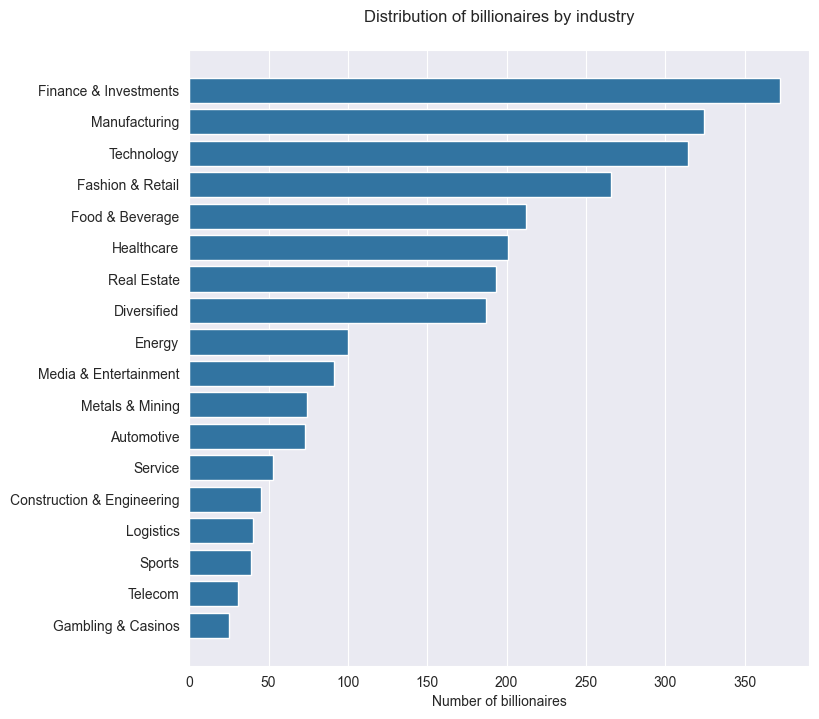

In [453]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df_bill_str, y='industries', order=df_bill_str['industries'].value_counts().index)
plt.title("Distribution of billionaires by industry", pad=20)
plt.xlabel("Number of billionaires")
plt.ylabel(None)
plt.plot()

In [455]:
df_bill_str_usa['industries'].value_counts().reset_index()

industries  count
0        Finance & Investments    190
1                   Technology    141
2              Food & Beverage     74
3             Fashion & Retail     63
4                  Real Estate     51
5        Media & Entertainment     37
6                       Energy     35
7                       Sports     35
8                   Healthcare     34
9                Manufacturing     28
10                     Service     19
11                 Diversified     13
12                  Automotive     12
13          Gambling & Casinos      6
14                     Telecom      5
15  Construction & Engineering      5
16                   Logistics      5
17             Metals & Mining      1

[]

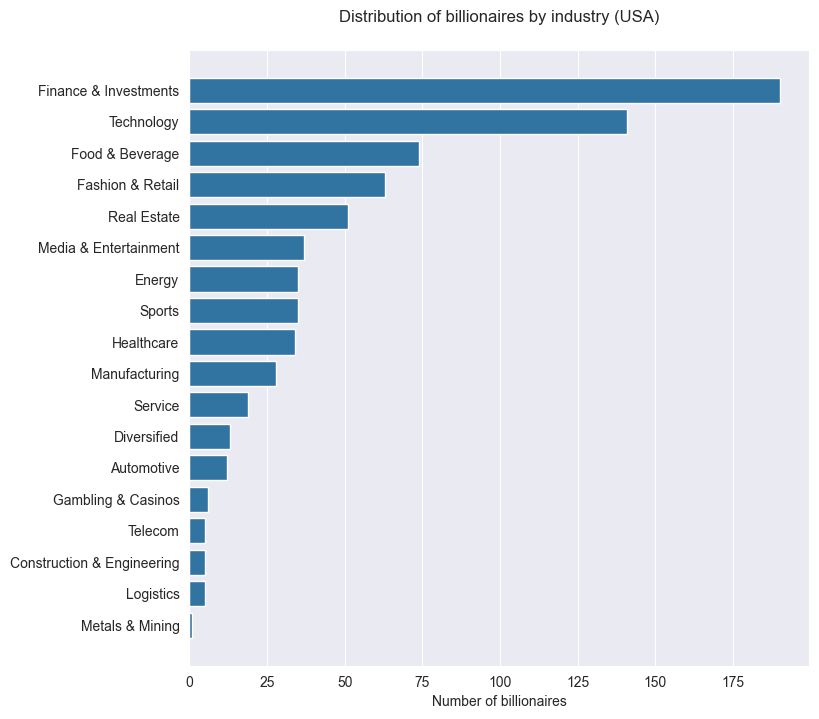

In [459]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df_bill_str_usa, y='industries', order=df_bill_str_usa['industries'].value_counts().index)
plt.title("Distribution of billionaires by industry (USA)", pad=20)
plt.xlabel("Number of billionaires")
plt.ylabel(None)
plt.plot()

In [456]:
df_bill_str_chi = df_bill_str[df_bill_str['country'] == 'China'].copy()

In [458]:
df_bill_str_chi['industries'].value_counts().reset_index()

industries  count
0                Manufacturing    143
1                   Technology     78
2                   Healthcare     72
3              Food & Beverage     46
4             Fashion & Retail     37
5                  Real Estate     31
6                   Automotive     22
7                       Energy     18
8                  Diversified     17
9              Metals & Mining     14
10                     Service     11
11       Media & Entertainment     11
12                   Logistics      8
13       Finance & Investments      8
14  Construction & Engineering      4
15                     Telecom      3

[]

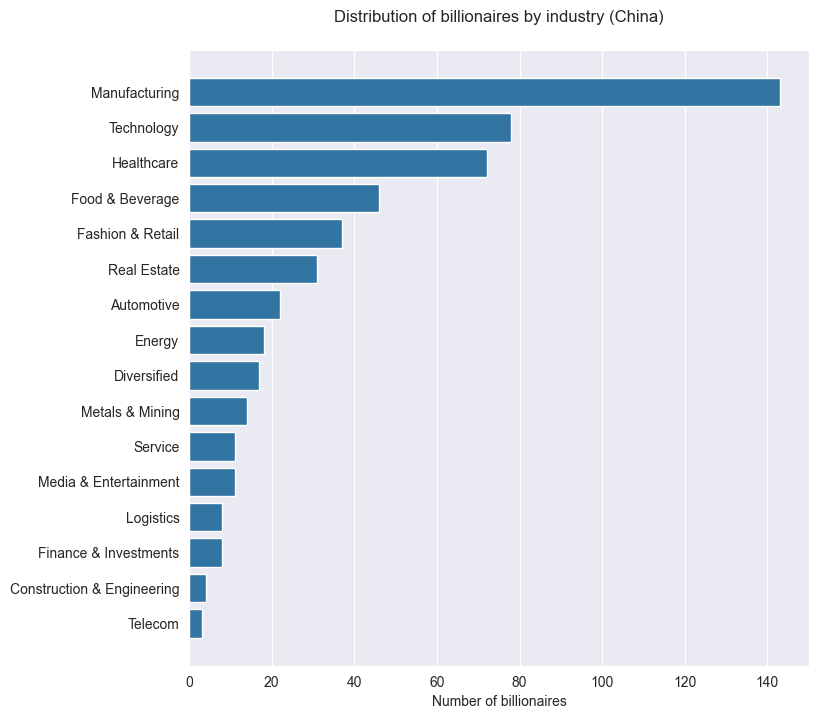

In [460]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df_bill_str_chi, y='industries', order=df_bill_str_chi['industries'].value_counts().index)
plt.title("Distribution of billionaires by industry (China)", pad=20)
plt.xlabel("Number of billionaires")
plt.ylabel(None)
plt.plot()

In [461]:
df_bill_str['country'].value_counts().reset_index().head(10)

country  count
0   United States    754
1           China    523
2           India    157
3         Germany    102
4  United Kingdom     82
5          Russia     79
6     Switzerland     78
7       Hong Kong     68
8           Italy     55
9       Singapore     46

In [490]:
df_bill_str_india = df_bill_str[df_bill_str['country'] == 'India'].copy()

[]

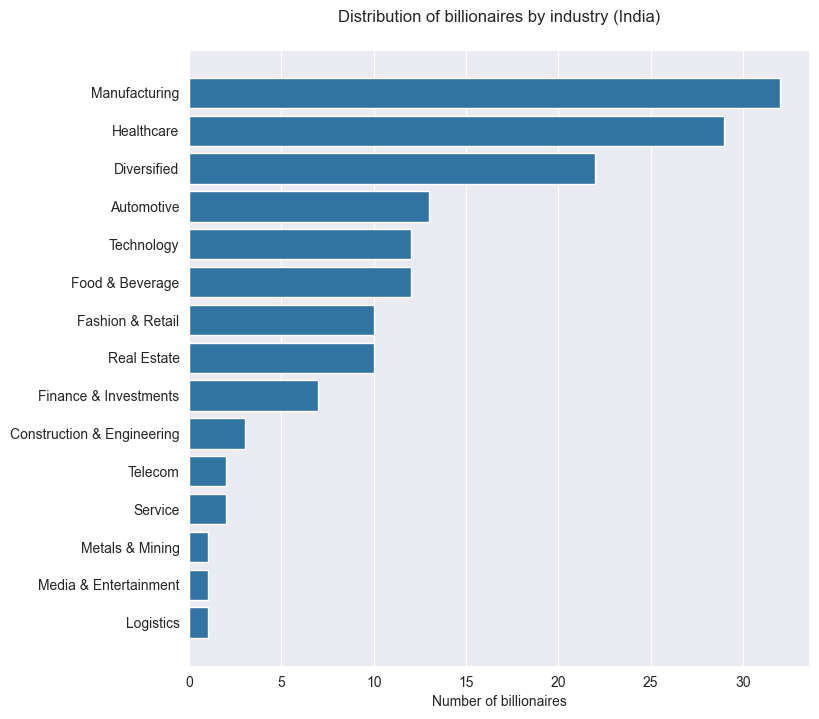

In [491]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df_bill_str_india, y='industries', order=df_bill_str_india['industries'].value_counts().index)
plt.title("Distribution of billionaires by industry (India)", pad=20)
plt.xlabel("Number of billionaires")
plt.ylabel(None)
plt.plot()

In [492]:
df_bill_str_germany = df_bill_str[df_bill_str['country'] == 'Germany'].copy()
df_bill_str_uk = df_bill_str[df_bill_str['country'] == 'United Kingdom'].copy()
df_bill_str_rus = df_bill_str[df_bill_str['country'] == 'Russia'].copy()

[]

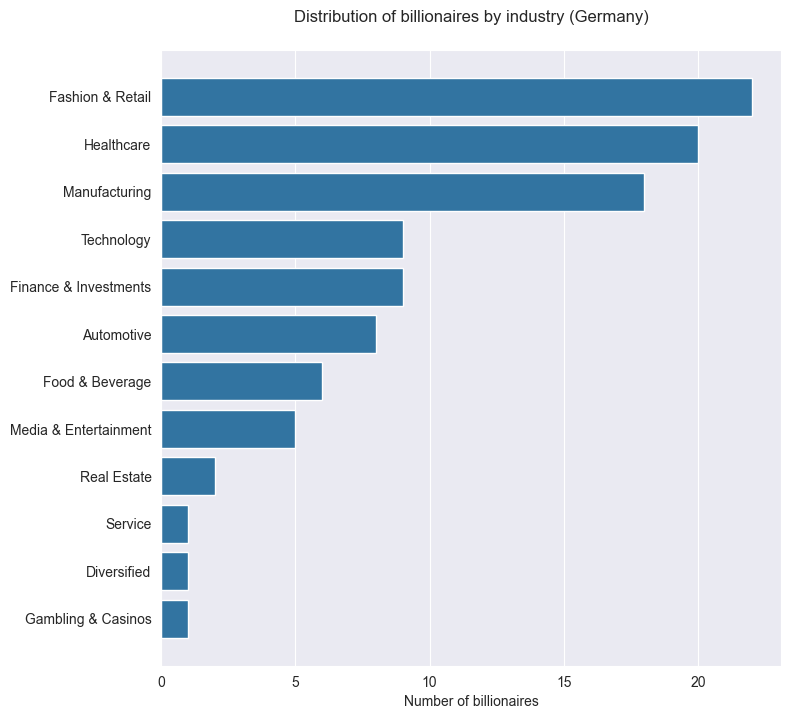

In [493]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df_bill_str_germany, y='industries', order=df_bill_str_germany['industries'].value_counts().index)
plt.title("Distribution of billionaires by industry (Germany)", pad=20)
plt.xlabel("Number of billionaires")
plt.ylabel(None)
plt.plot()

[]

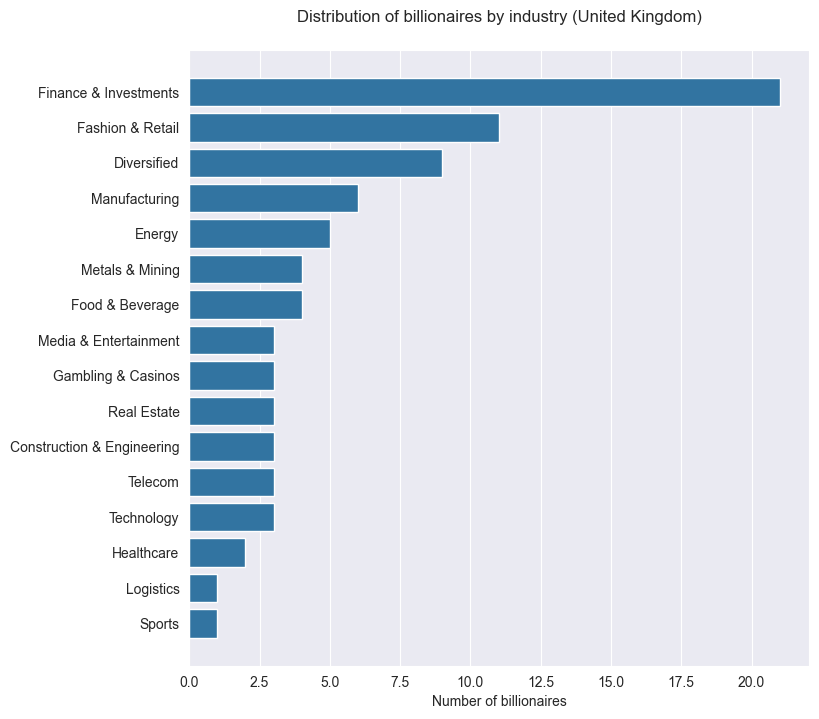

In [494]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df_bill_str_uk, y='industries', order=df_bill_str_uk['industries'].value_counts().index)
plt.title("Distribution of billionaires by industry (United Kingdom)", pad=20)
plt.xlabel("Number of billionaires")
plt.ylabel(None)
plt.plot()

[]

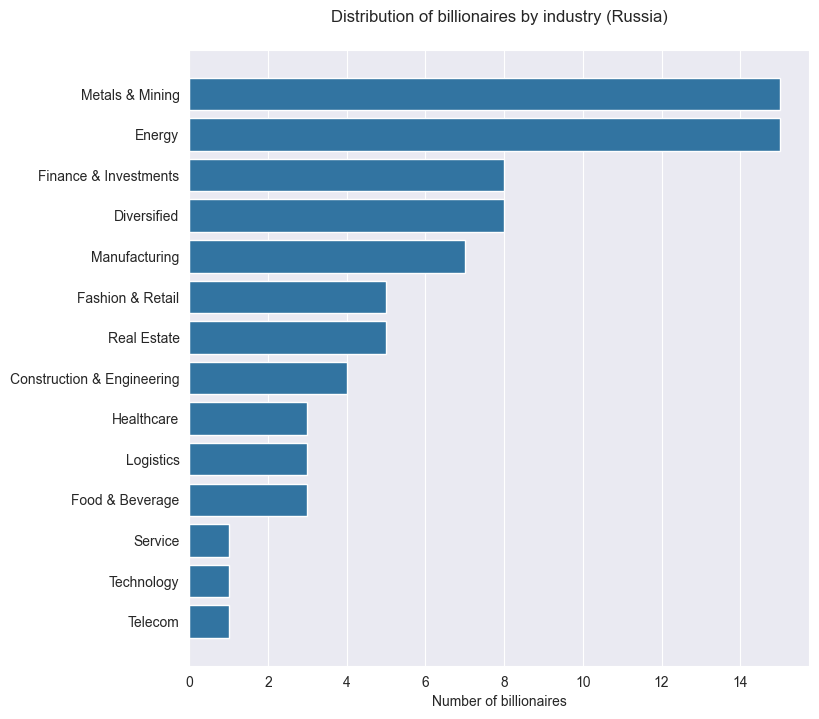

In [495]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df_bill_str_rus, y='industries', order=df_bill_str_rus['industries'].value_counts().index)
plt.title("Distribution of billionaires by industry (Russia)", pad=20)
plt.xlabel("Number of billionaires")
plt.ylabel(None)
plt.plot()

## 2.2. How does wealth distribution differ across industries?

In [503]:
df_bill_num['industries'] = df_bill_str['industries'].copy()

In [504]:
df_bill_num.columns

Index(['rank', 'finalWorth', 'age', 'selfMade', 'birthYear', 'birthMonth',
       'birthDay', 'cpi_country', 'cpi_change_country',
       'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country',
       'gdp_country', 'gdp_country_num', 'gender', 'country', 'industries'],
      dtype='object')

In [505]:
df_bill_num.dtypes

rank                                             int64
finalWorth                                       int64
age                                              int64
selfMade                                          bool
birthYear                                        int64
birthMonth                                       int64
birthDay                                         int64
cpi_country                                    float64
cpi_change_country                             float64
gross_tertiary_education_enrollment            float64
gross_primary_education_enrollment_country     float64
life_expectancy_country                        float64
tax_revenue_country_country                    float64
total_tax_rate_country                         float64
population_country                               int64
latitude_country                               float64
longitude_country                              float64
gdp_country                                     object
gdp_countr

In [506]:
df_bill_num.head()

rank  finalWorth  age  selfMade  birthYear  birthMonth  birthDay  \
0     1      211000   74     False       1949           3         5   
1     2      180000   51      True       1971           6        28   
2     3      114000   59      True       1964           1        12   
3     4      107000   78      True       1944           8        17   
4     5      106000   92      True       1930           8        30   

   cpi_country  cpi_change_country  gross_tertiary_education_enrollment  \
0       110.05                 1.1                                 65.6   
1       117.24                 7.5                                 88.2   
2       117.24                 7.5                                 88.2   
3       117.24                 7.5                                 88.2   
4       117.24                 7.5                                 88.2   

   gross_primary_education_enrollment_country  life_expectancy_country  \
0                                       102.5                     82.5   
1                                       101.8                     78.5   
2                                       101.8                     78.5   
3                                       101.8                     78.5   
4                                       101.8                     78.5   

   tax_revenue_country_country  total_tax_rate_country  population_country  \
0                         24.2                    60.7            67059887   
1                          9.6                    36.6           328239523   
2                          9.6                    36.6           328239523   
3                          9.6                    36.6           328239523   
4                          9.6                    36.6           328239523   

   latitude_country  longitude_country           gdp_country  gdp_country_num  \
0         46.227638           2.213749   $2,715,518,274,227      2.715518e+12   
1         37.090240         -95.712891  $21,427,700,000,000      2.142770e+13   
2         37.090240         -95.712891  $21,427,700,000,000      2.142770e+13   
3         37.090240         -95.712891  $21,427,700,000,000      2.142770e+13   
4         37.090240         -95.712891  $21,427,700,000,000      2.142770e+13   

  gender        country             industries  
0      M         France       Fashion & Retail  
1      M  United States             Automotive  
2      M  United States             Technology  
3      M  United States             Technology  
4      M  United States  Finance & Investments

In [509]:
final_worth_industries = df_bill_num.groupby('industries', observed=True)['finalWorth'].agg(['sum', 'mean']).reset_index()

In [511]:
final_worth_industries.sort_values(by=['sum', 'mean'], ascending=False)

industries      sum         mean
16                  Technology  1877900  5980.573248
4             Fashion & Retail  1698800  6386.466165
5        Finance & Investments  1605100  4314.784946
10               Manufacturing  1019000  3145.061728
6              Food & Beverage   957200  4515.094340
2                  Diversified   905200  4840.641711
13                 Real Estate   657400  3406.217617
8                   Healthcare   643200  3200.000000
0                   Automotive   525300  7195.890411
3                       Energy   453500  4535.000000
12             Metals & Mining   446800  6037.837838
11       Media & Entertainment   427500  4697.802198
9                    Logistics   239500  5987.500000
17                     Telecom   203500  6564.516129
14                     Service   173400  3271.698113
15                      Sports   134500  3448.717949
7           Gambling & Casinos   120500  4820.000000
1   Construction & Engineering   118500  2633.333333

[]

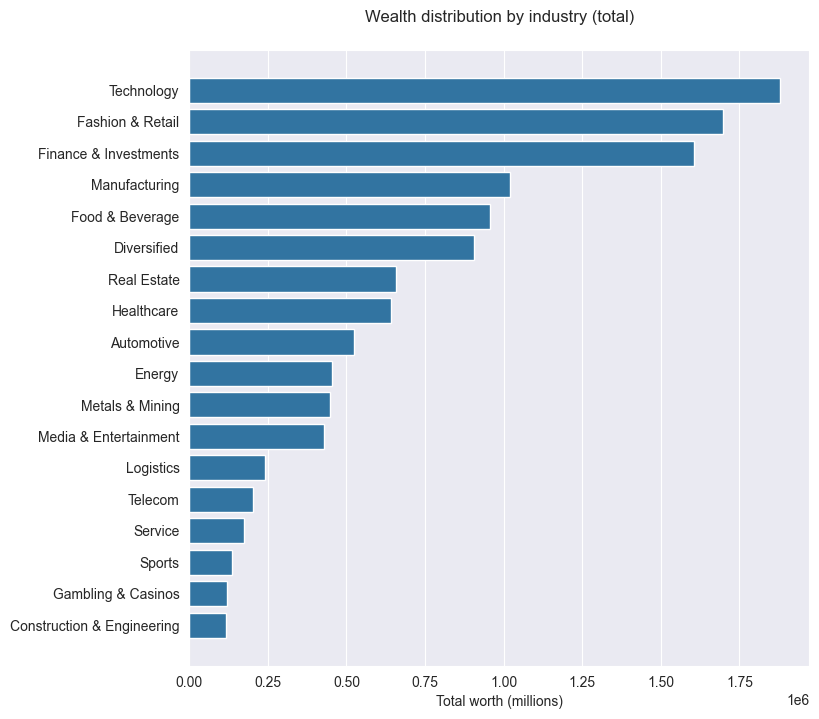

In [530]:
plt.figure(figsize=(8, 8))
sns.barplot(data=final_worth_industries.sort_values(by='sum', ascending=False), y='industries', x='sum')
plt.title("Wealth distribution by industry (total)", pad=20)
plt.xlabel("Total worth (millions)")
plt.ylabel(None)
plt.plot()

[]

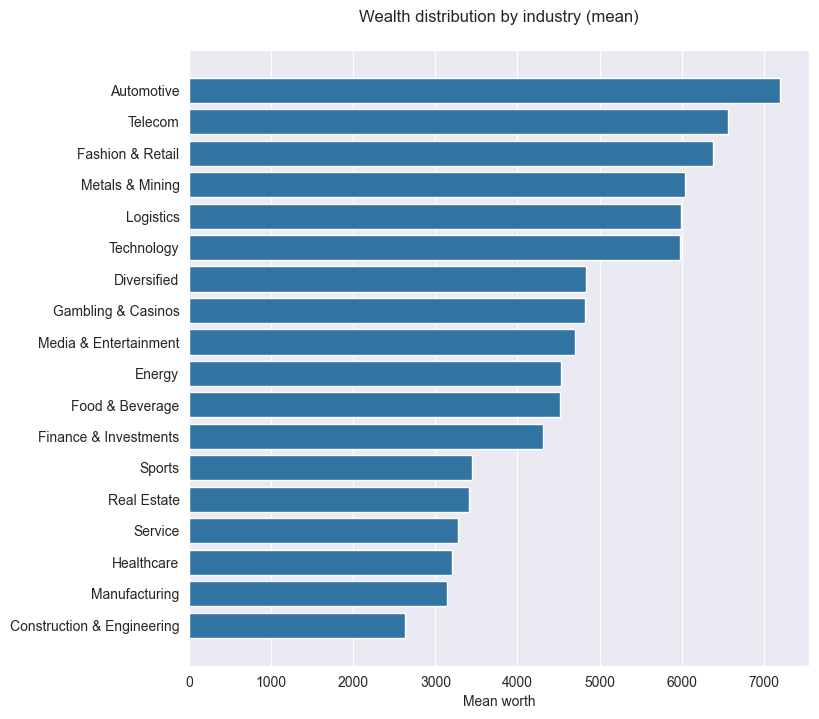

In [528]:
plt.figure(figsize=(8, 8))
sns.barplot(data=final_worth_industries.sort_values(by='mean', ascending=False), y='industries', x='mean')
plt.title("Wealth distribution by industry (mean)", pad=20)
plt.xlabel("Mean worth")
plt.ylabel(None)
plt.plot()

In [531]:
df_bill_str.columns

Index(['category', 'personName', 'country', 'city', 'source', 'industries',
       'countryOfCitizenship', 'organization', 'status', 'gender', 'birthDate',
       'lastName', 'firstName', 'title', 'date', 'state',
       'residenceStateRegion', 'gdp_country', 'birthMonthNames'],
      dtype='object')

In [535]:
df_bill_str.industries.value_counts()

industries
Finance & Investments         372
Manufacturing                 324
Technology                    314
Fashion & Retail              266
Food & Beverage               212
Healthcare                    201
Real Estate                   193
Diversified                   187
Energy                        100
Media & Entertainment          91
Metals & Mining                74
Automotive                     73
Service                        53
Construction & Engineering     45
Logistics                      40
Sports                         39
Telecom                        31
Gambling & Casinos             25
Name: count, dtype: int64

In [536]:
df_bill.head()

rank  finalWorth               category                personName   age  \
0     1      211000       Fashion & Retail  Bernard Arnault & family  74.0   
1     2      180000             Automotive                 Elon Musk  51.0   
2     3      114000             Technology                Jeff Bezos  59.0   
3     4      107000             Technology             Larry Ellison  78.0   
4     5      106000  Finance & Investments            Warren Buffett  92.0   

         country    city              source             industries  \
0         France   Paris                LVMH       Fashion & Retail   
1  United States  Austin       Tesla, SpaceX             Automotive   
2  United States  Medina              Amazon             Technology   
3  United States   Lanai              Oracle             Technology   
4  United States   Omaha  Berkshire Hathaway  Finance & Investments   

  countryOfCitizenship                      organization  selfMade status  \
0               France  LVMH Moët Hennessy Louis Vuitton     False      U   
1        United States                             Tesla      True      D   
2        United States                            Amazon      True      D   
3        United States                            Oracle      True      U   
4        United States    Berkshire Hathaway Inc. (Cl A)      True      D   

  gender       birthDate lastName firstName                 title  \
0      M   3/5/1949 0:00  Arnault   Bernard      Chairman and CEO   
1      M  6/28/1971 0:00     Musk      Elon                   CEO   
2      M  1/12/1964 0:00    Bezos      Jeff  Chairman and Founder   
3      M  8/17/1944 0:00  Ellison     Larry       CTO and Founder   
4      M  8/30/1930 0:00  Buffett    Warren                   CEO   

            date       state residenceStateRegion  birthYear  birthMonth  \
0  4/4/2023 5:01         NaN                  NaN     1949.0         3.0   
1  4/4/2023 5:01       Texas                South     1971.0         6.0   
2  4/4/2023 5:01  Washington                 West     1964.0         1.0   
3  4/4/2023 5:01      Hawaii                 West     1944.0         8.0   
4  4/4/2023 5:01    Nebraska              Midwest     1930.0         8.0   

   birthDay  cpi_country  cpi_change_country           gdp_country  \
0       5.0       110.05                 1.1   $2,715,518,274,227    
1      28.0       117.24                 7.5  $21,427,700,000,000    
2      12.0       117.24                 7.5  $21,427,700,000,000    
3      17.0       117.24                 7.5  $21,427,700,000,000    
4      30.0       117.24                 7.5  $21,427,700,000,000    

   gross_tertiary_education_enrollment  \
0                                 65.6   
1                                 88.2   
2                                 88.2   
3                                 88.2   
4                                 88.2   

   gross_primary_education_enrollment_country  life_expectancy_country  \
0                                       102.5                     82.5   
1                                       101.8                     78.5   
2                                       101.8                     78.5   
3                                       101.8                     78.5   
4                                       101.8                     78.5   

   tax_revenue_country_country  total_tax_rate_country  population_country  \
0                         24.2                    60.7          67059887.0   
1                          9.6                    36.6         328239523.0   
2                          9.6                    36.6         328239523.0   
3                          9.6                    36.6         328239523.0   
4                          9.6                    36.6         328239523.0   

   latitude_country  longitude_country  
0         46.227638           2.213749  
1         37.090240         -95.712891  
2         37.090240         -95.712891  
3         37.090240 

In [657]:
df_bill_num.columns

Index(['rank', 'finalWorth', 'age', 'selfMade', 'birthYear', 'birthMonth',
       'birthDay', 'cpi_country', 'cpi_change_country',
       'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country',
       'gdp_country', 'gdp_country_num', 'gender', 'country', 'industries',
       'nBillionaires'],
      dtype='object')

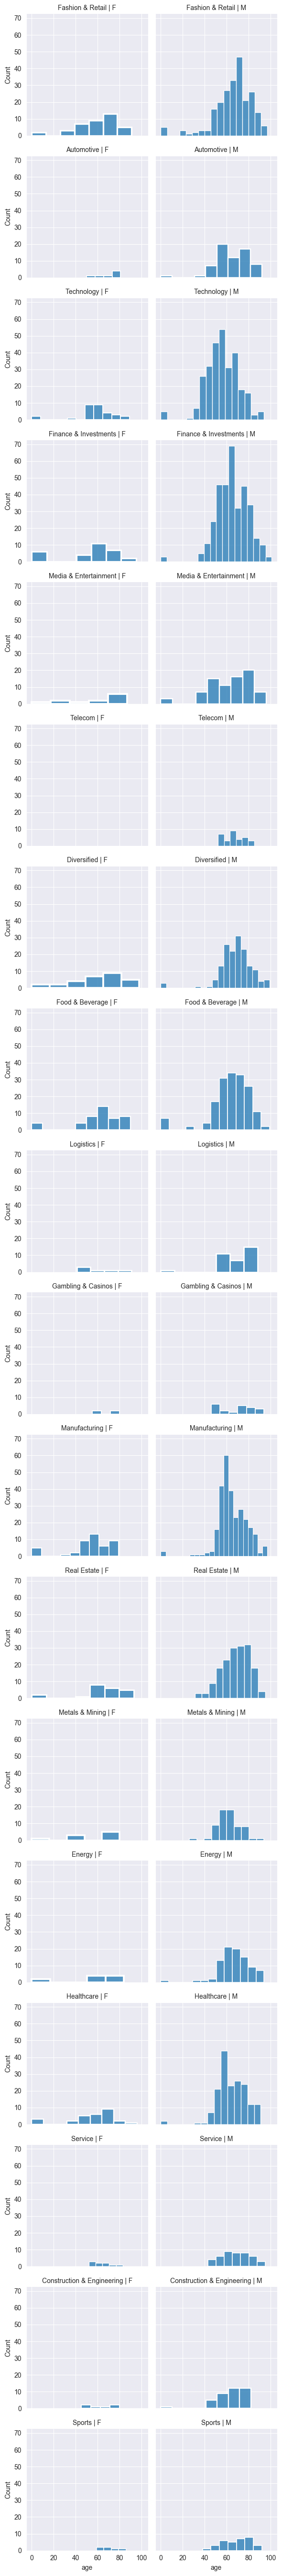

In [666]:
# 1. Set up facet grid
g = sns.FacetGrid(df_bill_num, row='industries', col='gender')

# 2. Specify plot type
g.map_dataframe(sns.histplot, x='age', lw=3, fill=True)

# Use the custom function defined above
# g.map_dataframe(add_mean_line)
# get_gender = "Female" if col_name == "F" else "Male"

# 3. Customize/style the plot with methods and attributes
g.set_titles(row_template='{row_name}', col_template='{col_name}')

In [668]:
df_bill_num.columns

Index(['rank', 'finalWorth', 'age', 'selfMade', 'birthYear', 'birthMonth',
       'birthDay', 'cpi_country', 'cpi_change_country',
       'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country',
       'gdp_country', 'gdp_country_num', 'gender', 'country', 'industries',
       'nBillionaires'],
      dtype='object')

In [ ]:
df_bill_num.select_dtypes(include=['number', 'bool'])

Index(['rank', 'finalWorth', 'age', 'selfMade', 'birthYear', 'birthMonth',
       'birthDay', 'cpi_country', 'cpi_change_country',
       'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country',
       'gdp_country_num', 'nBillionaires'],
      dtype='object')

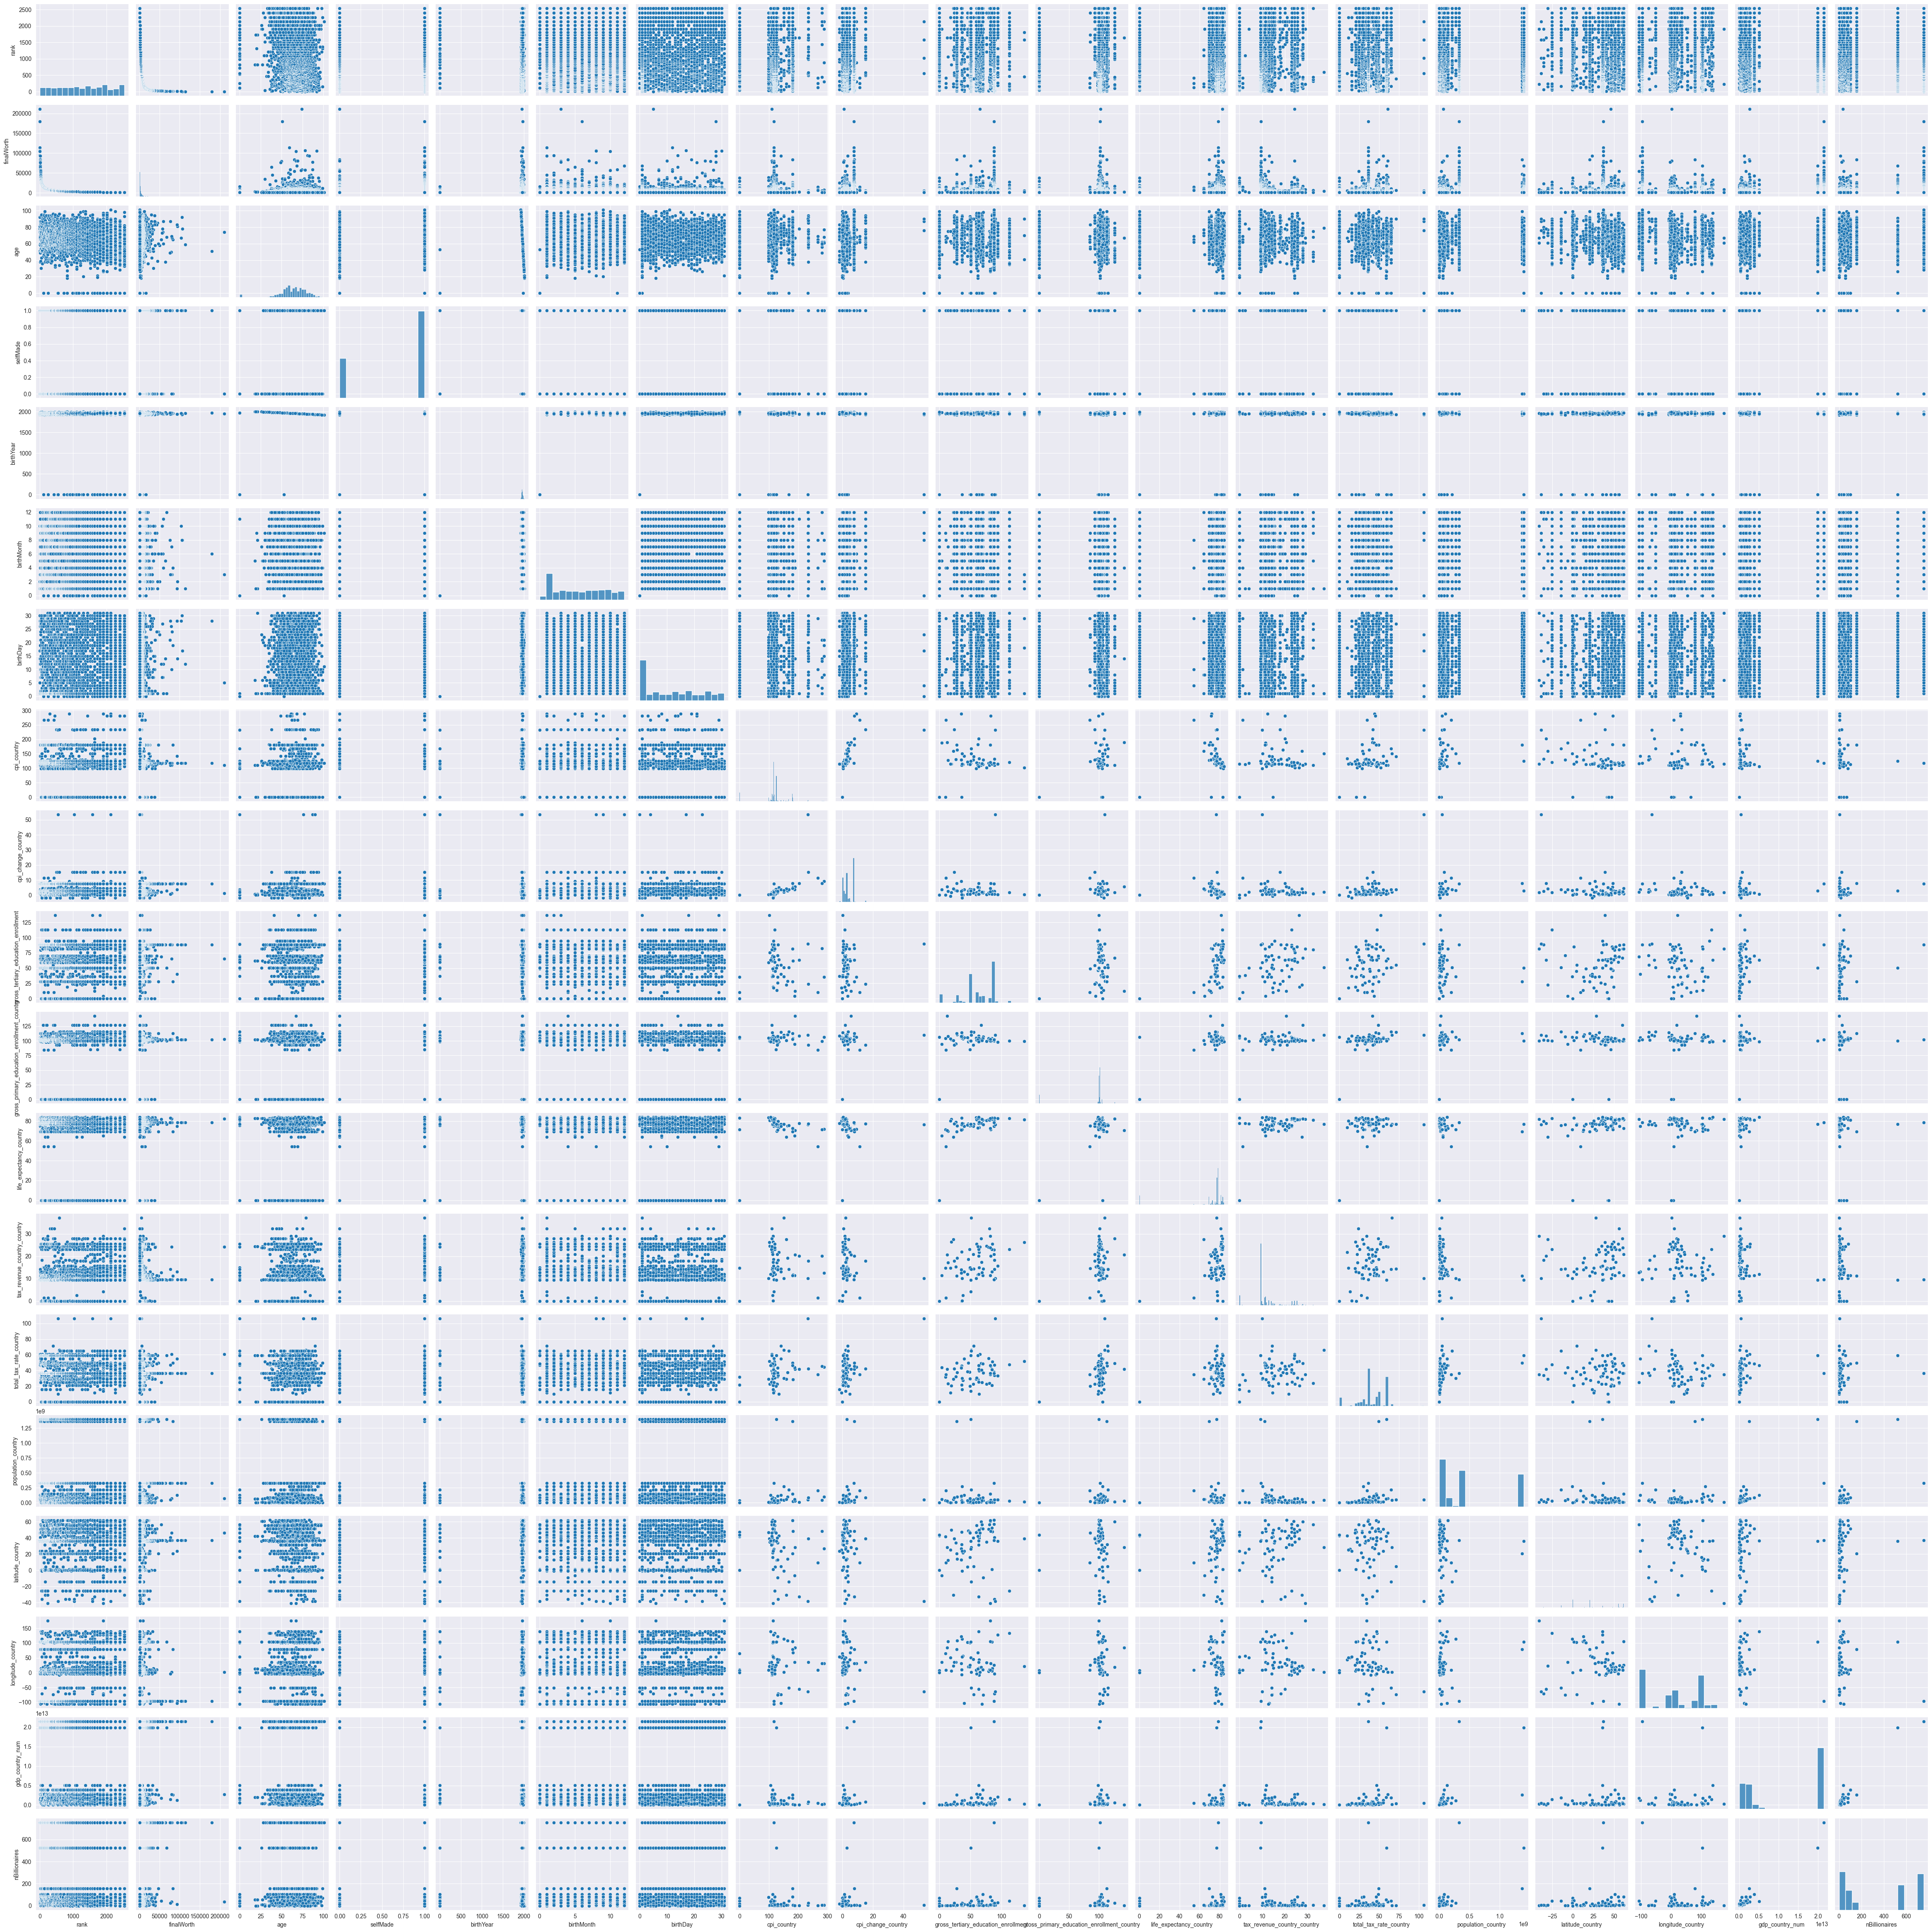

In [671]:
sns.pairplot(data=df_bill_num.select_dtypes(include=['number', 'bool']))

<Axes: xlabel='gdp_country_num', ylabel='nBillionaires'>

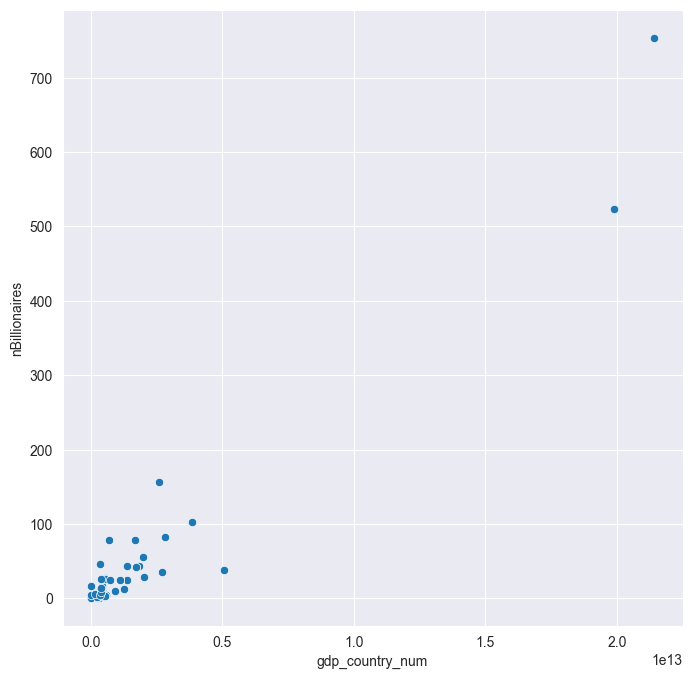

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_bill_num, x='gdp_country_num', y='nBillionaires')